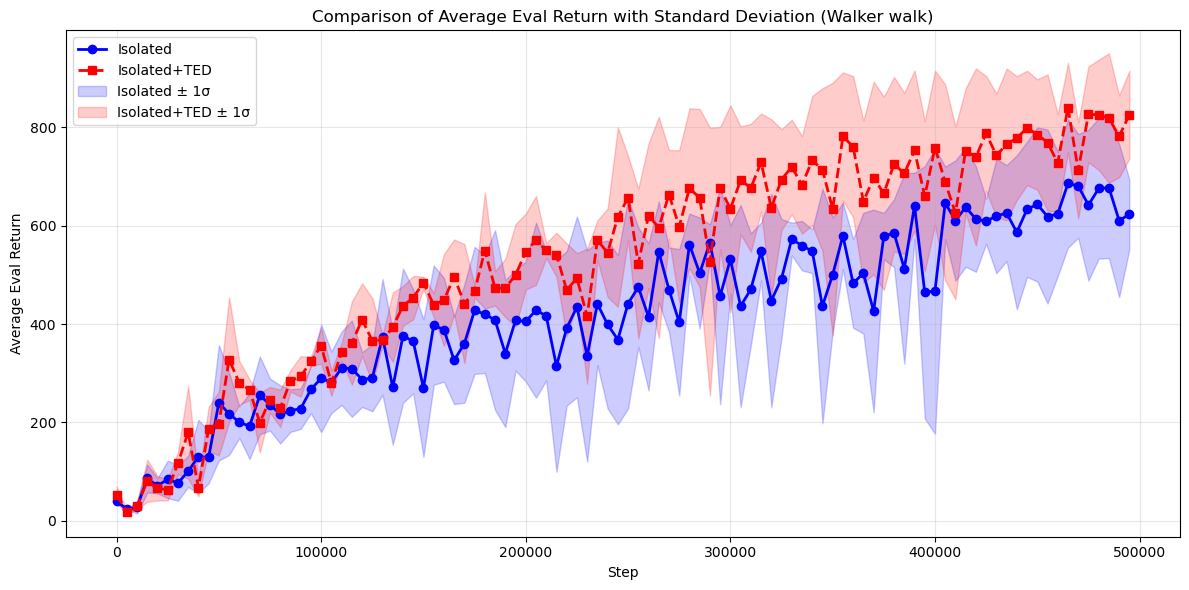

Isolated - Final avg return: 622.95 ± 71.15
Isolated+TED - Final avg return: 825.54 ± 89.30


In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

def compute_avg_returns_with_std(file_paths):
    step_to_returns = defaultdict(list)
    for path in file_paths:
        with open(path, 'r') as f:
            for line in f:
                try:
                    data = json.loads(line)
                    if 'eval_return' in data:
                        step = data['step']
                        eval_return = data['eval_return']
                        step_to_returns[step].append(eval_return)
                except json.JSONDecodeError:
                    continue
    
    steps = sorted(step_to_returns.keys())
    avg_returns = []
    std_returns = []
    
    for step in steps:
        returns = step_to_returns[step]
        avg_returns.append(np.mean(returns))
        std_returns.append(np.std(returns))
    
    return steps, avg_returns, std_returns

# Group 1: iso (baseline)
file_paths_1 = ['/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_1/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso/metrics.jsonl', 
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_2/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_3/metrics.jsonl'] 

# Group 2: iso+ted
file_paths_2 = ['/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_1/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted/metrics.jsonl', 
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_2/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_2/metrics.jsonl'] 

# Compute average returns and standard deviations for both groups
steps_1, avg_returns_1, std_returns_1 = compute_avg_returns_with_std(file_paths_1)
steps_2, avg_returns_2, std_returns_2 = compute_avg_returns_with_std(file_paths_2)

# Convert to numpy arrays for easier manipulation
steps_1, avg_returns_1, std_returns_1 = np.array(steps_1), np.array(avg_returns_1), np.array(std_returns_1)
steps_2, avg_returns_2, std_returns_2 = np.array(steps_2), np.array(avg_returns_2), np.array(std_returns_2)

# Plotting
plt.figure(figsize=(12, 6))

# Plot mean lines
plt.plot(steps_1, avg_returns_1, marker='o', linestyle='-', label='Isolated', color='blue', linewidth=2)
plt.plot(steps_2, avg_returns_2, marker='s', linestyle='--', label='Isolated+TED', color='red', linewidth=2)

# Add shaded regions for standard deviation
plt.fill_between(steps_1, avg_returns_1 - std_returns_1, avg_returns_1 + std_returns_1, 
                 alpha=0.2, color='blue', label='Isolated ± 1σ')
plt.fill_between(steps_2, avg_returns_2 - std_returns_2, avg_returns_2 + std_returns_2, 
                 alpha=0.2, color='red', label='Isolated+TED ± 1σ')

plt.xlabel('Step')
plt.ylabel('Average Eval Return')
plt.title('Comparison of Average Eval Return with Standard Deviation (Walker walk)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Optional: Print some statistics
print(f"Isolated - Final avg return: {avg_returns_1[-1]:.2f} ± {std_returns_1[-1]:.2f}")
print(f"Isolated+TED - Final avg return: {avg_returns_2[-1]:.2f} ± {std_returns_2[-1]:.2f}")

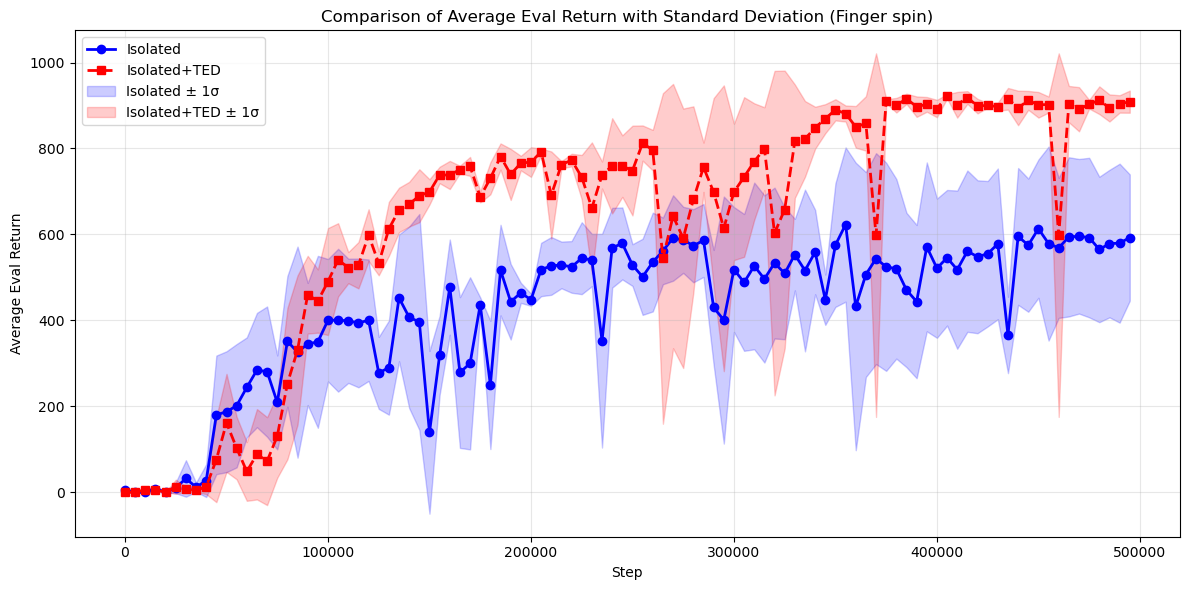

Isolated - Final avg return: 592.67 ± 146.99
Isolated+TED - Final avg return: 909.00 ± 25.78


In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

def compute_avg_returns_with_std(file_paths):
    step_to_returns = defaultdict(list)
    for path in file_paths:
        with open(path, 'r') as f:
            for line in f:
                try:
                    data = json.loads(line)
                    if 'eval_return' in data:
                        step = data['step']
                        eval_return = data['eval_return']
                        step_to_returns[step].append(eval_return)
                except json.JSONDecodeError:
                    continue
    
    steps = sorted(step_to_returns.keys())
    avg_returns = []
    std_returns = []
    
    for step in steps:
        returns = step_to_returns[step]
        avg_returns.append(np.mean(returns))
        std_returns.append(np.std(returns))
    
    return steps, avg_returns, std_returns

# Group 1: iso (baseline)
file_paths_1 = ['/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_finger_spin/iso_1/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_finger_spin/iso/metrics.jsonl', 
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_finger_spin/iso_2/metrics.jsonl'] 

# Group 2: iso+ted
file_paths_2 = ['/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_finger_spin/iso_ted_1/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_finger_spin/iso_ted/metrics.jsonl', 
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_finger_spin/iso_ted_2/metrics.jsonl'] 

# Compute average returns and standard deviations for both groups
steps_1, avg_returns_1, std_returns_1 = compute_avg_returns_with_std(file_paths_1)
steps_2, avg_returns_2, std_returns_2 = compute_avg_returns_with_std(file_paths_2)

# Convert to numpy arrays for easier manipulation
steps_1, avg_returns_1, std_returns_1 = np.array(steps_1), np.array(avg_returns_1), np.array(std_returns_1)
steps_2, avg_returns_2, std_returns_2 = np.array(steps_2), np.array(avg_returns_2), np.array(std_returns_2)

# Plotting
plt.figure(figsize=(12, 6))

# Plot mean lines
plt.plot(steps_1, avg_returns_1, marker='o', linestyle='-', label='Isolated', color='blue', linewidth=2)
plt.plot(steps_2, avg_returns_2, marker='s', linestyle='--', label='Isolated+TED', color='red', linewidth=2)

# Add shaded regions for standard deviation
plt.fill_between(steps_1, avg_returns_1 - std_returns_1, avg_returns_1 + std_returns_1, 
                 alpha=0.2, color='blue', label='Isolated ± 1σ')
plt.fill_between(steps_2, avg_returns_2 - std_returns_2, avg_returns_2 + std_returns_2, 
                 alpha=0.2, color='red', label='Isolated+TED ± 1σ')

plt.xlabel('Step')
plt.ylabel('Average Eval Return')
plt.title('Comparison of Average Eval Return with Standard Deviation (Finger spin)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Optional: Print some statistics
print(f"Isolated - Final avg return: {avg_returns_1[-1]:.2f} ± {std_returns_1[-1]:.2f}")
print(f"Isolated+TED - Final avg return: {avg_returns_2[-1]:.2f} ± {std_returns_2[-1]:.2f}")

# Math proof

## Theorem 1: Controllability-Based Separation Reduces Factor Correlation

**Claim:** The Iso-Dream++ three-branch separation reduces within-branch factor correlation compared to joint factor space.

### Proof:

Let $C(f_i, f_j)$ denote the correlation between factors $f_i$ and $f_j$.

Define factor sets:
- $F_s = \{f_i : \frac{\partial f_i}{\partial a} \neq 0\}$ (controllable factors)
- $F_z = \{f_i : \frac{\partial f_i}{\partial a} = 0, \frac{\partial f_i}{\partial t} \neq 0\}$ (noncontrollable dynamic factors)  
- $F_b = \{f_i : \frac{\partial f_i}{\partial a} = 0, \frac{\partial f_i}{\partial t} = 0\}$ (static factors)

### Lemma 1.1

Cross-set correlations dominate within-set correlations. For factors from different sets, correlations arise from shared causal influences:

$$\mathbb{E}[C(f_i, f_j)] \geq \mathbb{E}[C(f_i, f_k)] \text{ where } f_i, f_j \text{ from different sets, } f_i, f_k \text{ from same set}$$

#### Proof of Lemma 1.1:

Factors in different sets respond to different causal mechanisms. Cross-set correlations emerge from:

1. Agent actions affecting multiple factor types simultaneously
2. Environmental coupling between controllable and noncontrollable dynamics

Within-set factors share similar causal structures, reducing spurious correlations.

### Main Result

Total correlation in joint space vs. separated space:

$$\text{Corr}_{\text{joint}} = \sum_{i=1}^k \sum_{j \neq i}^k C(f_i, f_j)$$

$$\text{Corr}_{\text{separated}} = \sum_{S \in \{F_s, F_z, F_b\}} \sum_{f_i, f_j \in S, i \neq j} C(f_i, f_j)$$

Since cross-set correlations are eliminated:

$$\text{Corr}_{\text{separated}} < \text{Corr}_{\text{joint}}$$

## Theorem 2: Temporal Disentanglement Quality Improvement

**Claim:** TED's disentanglement quality improves significantly when applied to pre-separated factor groups.

### Setup

Define the TED objective function for a factor set $F$:

$$L_{\text{TED}}(F) = -\sum_{(x_t, x_{t+1}) \in \mathcal{T}} \log \sigma(y(z(x_t), z(x_{t+1}))) - \sum_{(x_t, x_{t'}) \in \mathcal{N}} \log(1 - \sigma(y(z(x_t), z(x_{t'}))))$$

where $\mathcal{T}$ are temporal pairs and $\mathcal{N}$ are non-temporal pairs.

### Theorem 2.1

Disentanglement error bounds are tighter for separated factors.

The TED classifier tries to discriminate temporal vs non-temporal pairs using:

$$y(z_1, z_2) = \sum_{i=1}^m |k_1^i z_1^i + k_2^i z_2^i + b^i| - (\bar{k}^i z_1^i + \bar{b}^i)^2 + c$$

### Error Analysis

For joint factor space, the classification error is bounded by:

$$\epsilon_{\text{joint}} \leq \frac{1}{2}\exp\left(-\frac{(\mu_{\mathcal{T}} - \mu_{\mathcal{N}})^2}{2(\sigma_{\mathcal{T}}^2 + \sigma_{\mathcal{N}}^2 + \text{Corr}_{\text{cross}})}\right)$$

For separated factor space:

$$\epsilon_{\text{separated}} \leq \frac{1}{2}\exp\left(-\frac{(\mu_{\mathcal{T}} - \mu_{\mathcal{N}})^2}{2(\sigma_{\mathcal{T}}^2 + \sigma_{\mathcal{N}}^2)}\right)$$

where $\text{Corr}_{\text{cross}} > 0$ represents additional noise from cross-factor correlations.

### Result

$$\epsilon_{\text{separated}} < \epsilon_{\text{joint}}$$

## Mathematical Proof: How Inverse Action Cell Promotes Factor Independence

### Problem Setup

Consider the action-conditioned branch that learns latent state representation $s_t \in \mathbb{R}^d$ where each dimension can be viewed as a factor: $s_t = [s_t^{(1)}, s_t^{(2)}, \ldots, s_t^{(d)}]$.

**Goal**: Show how the inverse action cell promotes independence between factors $s_t^{(i)}$ and $s_t^{(j)}$ for $i \neq j$.

### Inverse Action Cell Objective

The inverse action cell learns to predict actions from consecutive states:
$$\mathcal{L}_{\text{inverse}} = \mathbb{E}_{(s_{t-1}, s_t, a_{t-1})} \left[ \|a_{t-1} - f_{\text{inv}}(s_{t-1}, s_t)\|^2 \right]$$

where $f_{\text{inv}}$ is typically implemented as:
$$f_{\text{inv}}(s_{t-1}, s_t) = \text{MLP}(s_{t-1}, s_t)$$

### Theorem: Inverse Action Cell Promotes Factor Independence

**Theorem**: Under the inverse dynamics objective, factors that are conditionally independent given the action signal will tend to become more independent in the learned representation.

#### Proof

**Step 1: Decompose the action prediction**

Assume the action can be decomposed based on different controllable aspects:
$$a_{t-1} = g_1(\Delta s_t^{(1)}) + g_2(\Delta s_t^{(2)}) + \ldots + g_k(\Delta s_t^{(k)}) + \epsilon$$

where $\Delta s_t^{(i)} = s_t^{(i)} - s_{t-1}^{(i)}$ and $\epsilon$ is noise.

**Step 2: Optimal solution analysis**

The optimal inverse function $f_{\text{inv}}^*$ minimizes the prediction error:
$$f_{\text{inv}}^* = \arg\min_{f} \mathbb{E}\left[ \|a_{t-1} - f(s_{t-1}, s_t)\|^2 \right]$$

The optimal solution is:
$$f_{\text{inv}}^*(s_{t-1}, s_t) = \mathbb{E}[a_{t-1} | s_{t-1}, s_t]$$

**Step 3: Information-theoretic perspective**

For the inverse prediction to be accurate, the mutual information between factors and actions should be maximized:
$$I(s_t^{(i)}; a_{t-1} | s_{t-1}) = H(s_t^{(i)} | s_{t-1}) - H(s_t^{(i)} | a_{t-1}, s_{t-1})$$

**Step 4: Independence emerges through specialization**

If factors $s_t^{(i)}$ and $s_t^{(j)}$ both contribute to the same action prediction, the model has redundancy. To minimize reconstruction error while maintaining predictive power, the optimal solution tends to:

1. **Specialize factors**: Each factor $s_t^{(i)}$ becomes responsible for predicting a specific aspect of the action
2. **Reduce redundancy**: Overlapping information between factors is eliminated

**Step 5: Formal independence condition**

Under optimal training, factors become independent if:
$$p(s_t^{(i)}, s_t^{(j)} | a_{t-1}, s_{t-1}) = p(s_t^{(i)} | a_{t-1}, s_{t-1}) \cdot p(s_t^{(j)} | a_{t-1}, s_{t-1})$$

This occurs when each factor captures disjoint aspects of the action-state relationship.

### Corollary: Min-Max Variance Enhances Independence

The paper's min-max variance constraint further promotes independence:

$$\mathcal{L}_{\text{var}} = \lambda_1 \max \sum_t \text{Var}(\tilde{s}_t^i) + \lambda_2 \min \sum_t \text{Var}(\tilde{z}_t^i)$$


## Loss Analysis

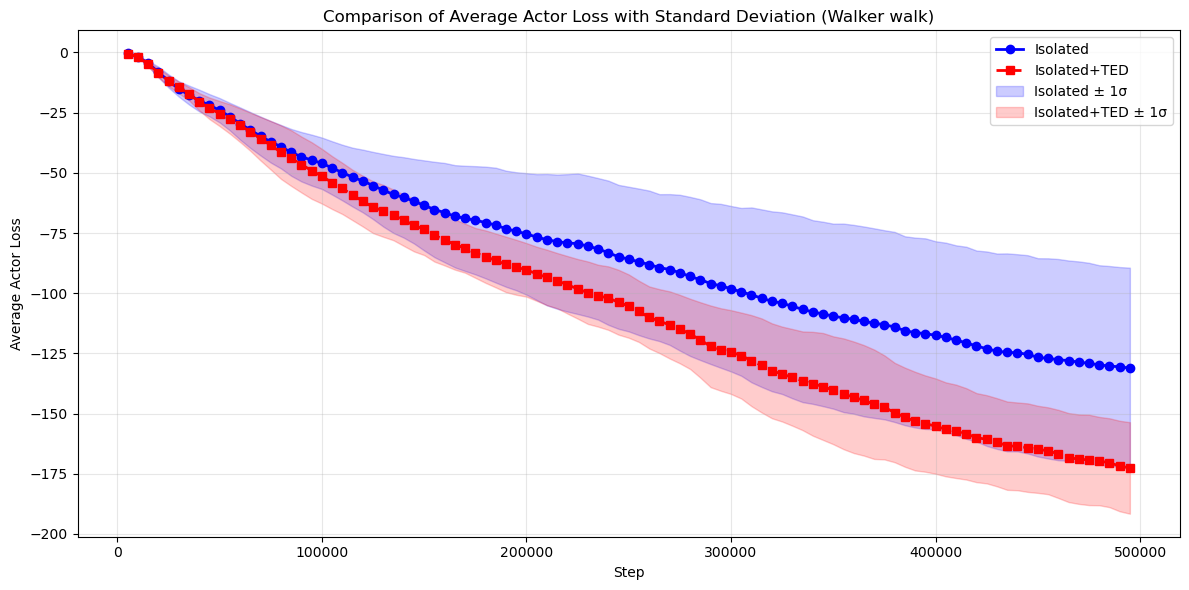

Isolated - Final avg return: -131.10 ± 41.71
Isolated+TED - Final avg return: -172.59 ± 19.00


In [8]:
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

def compute_avg_returns_with_std(file_paths):
    step_to_returns = defaultdict(list)
    for path in file_paths:
        with open(path, 'r') as f:
            for line in f:
                try:
                    data = json.loads(line)
                    if 'actor_loss' in data:
                        step = data['step']
                        eval_return = data['actor_loss']
                        step_to_returns[step].append(eval_return)
                except json.JSONDecodeError:
                    continue
    
    steps = sorted(step_to_returns.keys())
    avg_returns = []
    std_returns = []
    
    for step in steps:
        returns = step_to_returns[step]
        avg_returns.append(np.mean(returns))
        std_returns.append(np.std(returns))
    
    return steps, avg_returns, std_returns

# Group 1: iso (baseline)
file_paths_1 = ['/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_1/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso/metrics.jsonl', 
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_2/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_3/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_5/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_6/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_7/metrics.jsonl'] 

# Group 2: iso+ted
file_paths_2 = ['/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_1/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted/metrics.jsonl', 
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_2/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_3/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_5/metrics.jsonl'] 

# Compute average returns and standard deviations for both groups
steps_1, avg_returns_1, std_returns_1 = compute_avg_returns_with_std(file_paths_1)
steps_2, avg_returns_2, std_returns_2 = compute_avg_returns_with_std(file_paths_2)

# Convert to numpy arrays for easier manipulation
steps_1, avg_returns_1, std_returns_1 = np.array(steps_1), np.array(avg_returns_1), np.array(std_returns_1)
steps_2, avg_returns_2, std_returns_2 = np.array(steps_2), np.array(avg_returns_2), np.array(std_returns_2)

# Plotting
plt.figure(figsize=(12, 6))

# Plot mean lines
plt.plot(steps_1, avg_returns_1, marker='o', linestyle='-', label='Isolated', color='blue', linewidth=2)
plt.plot(steps_2, avg_returns_2, marker='s', linestyle='--', label='Isolated+TED', color='red', linewidth=2)

# Add shaded regions for standard deviation
plt.fill_between(steps_1, avg_returns_1 - std_returns_1, avg_returns_1 + std_returns_1, 
                 alpha=0.2, color='blue', label='Isolated ± 1σ')
plt.fill_between(steps_2, avg_returns_2 - std_returns_2, avg_returns_2 + std_returns_2, 
                 alpha=0.2, color='red', label='Isolated+TED ± 1σ')

plt.xlabel('Step')
plt.ylabel('Average Actor Loss')
plt.title('Comparison of Average Actor Loss with Standard Deviation (Walker walk)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Optional: Print some statistics
print(f"Isolated - Final avg return: {avg_returns_1[-1]:.2f} ± {std_returns_1[-1]:.2f}")
print(f"Isolated+TED - Final avg return: {avg_returns_2[-1]:.2f} ± {std_returns_2[-1]:.2f}")

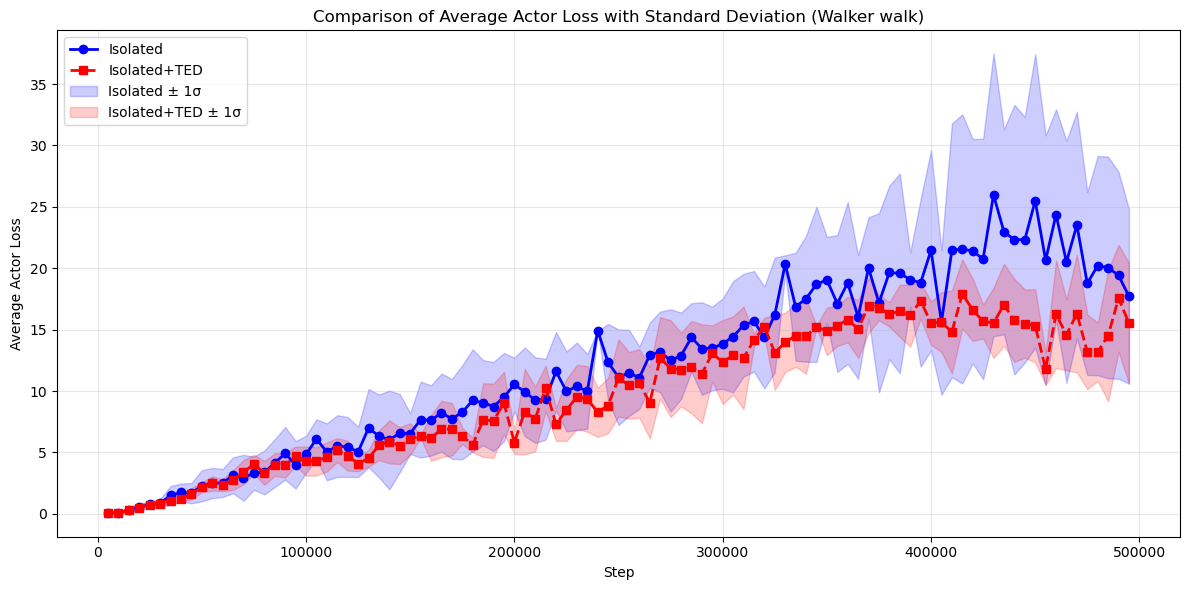

Isolated - Final avg return: 17.70 ± 7.10
Isolated+TED - Final avg return: 15.52 ± 4.93


In [7]:
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

import json
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

def compute_avg_returns_with_std(file_paths):
    step_to_returns = defaultdict(list)
    for path in file_paths:
        with open(path, 'r') as f:
            for line in f:
                try:
                    data = json.loads(line)
                    if 'actor_grad_norm' in data:
                        step = data['step']
                        eval_return = data['actor_grad_norm']
                        # Filter out inf and nan values
                        if np.isfinite(eval_return):
                            step_to_returns[step].append(eval_return)
                except json.JSONDecodeError:
                    continue
    
    steps = sorted(step_to_returns.keys())
    avg_returns = []
    std_returns = []
    
    for step in steps:
        returns = step_to_returns[step]
        if returns:  # Only compute if we have valid data
            avg_returns.append(np.mean(returns))
            std_returns.append(np.std(returns))
        else:
            # Skip this step entirely if no valid data
            continue
    
    return steps, avg_returns, std_returns

# Group 1: iso (baseline)
file_paths_1 = ['/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_1/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso/metrics.jsonl', 
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_2/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_3/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_5/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_6/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_7/metrics.jsonl'] 

# Group 2: iso+ted
file_paths_2 = ['/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_1/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted/metrics.jsonl', 
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_2/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_3/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_5/metrics.jsonl'] 

# Compute average returns and standard deviations for both groups
steps_1, avg_returns_1, std_returns_1 = compute_avg_returns_with_std(file_paths_1)
steps_2, avg_returns_2, std_returns_2 = compute_avg_returns_with_std(file_paths_2)

# Convert to numpy arrays for easier manipulation
steps_1, avg_returns_1, std_returns_1 = np.array(steps_1), np.array(avg_returns_1), np.array(std_returns_1)
steps_2, avg_returns_2, std_returns_2 = np.array(steps_2), np.array(avg_returns_2), np.array(std_returns_2)

# Plotting
plt.figure(figsize=(12, 6))

# Plot mean lines
plt.plot(steps_1, avg_returns_1, marker='o', linestyle='-', label='Isolated', color='blue', linewidth=2)
plt.plot(steps_2, avg_returns_2, marker='s', linestyle='--', label='Isolated+TED', color='red', linewidth=2)

# Add shaded regions for standard deviation
plt.fill_between(steps_1, avg_returns_1 - std_returns_1, avg_returns_1 + std_returns_1, 
                 alpha=0.2, color='blue', label='Isolated ± 1σ')
plt.fill_between(steps_2, avg_returns_2 - std_returns_2, avg_returns_2 + std_returns_2, 
                 alpha=0.2, color='red', label='Isolated+TED ± 1σ')

plt.xlabel('Step')
plt.ylabel('Average Actor Loss')
plt.title('Comparison of Average Actor Loss with Standard Deviation (Walker walk)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Optional: Print some statistics
print(f"Isolated - Final avg return: {avg_returns_1[-1]:.2f} ± {std_returns_1[-1]:.2f}")
print(f"Isolated+TED - Final avg return: {avg_returns_2[-1]:.2f} ± {std_returns_2[-1]:.2f}")

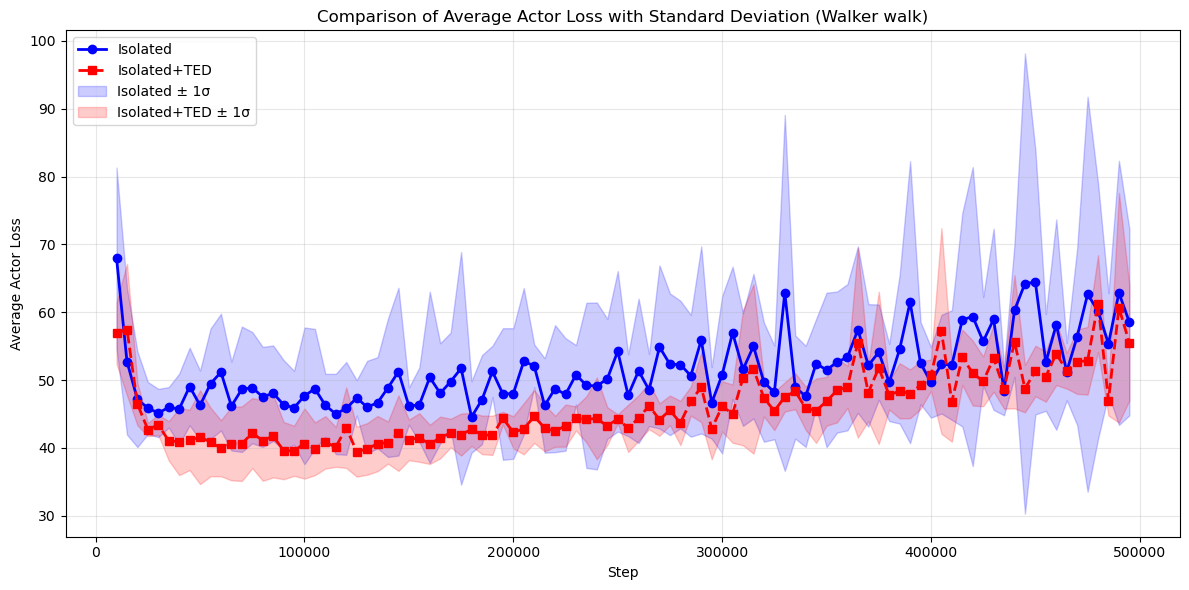

Isolated - Final avg return: 58.53 ± 13.74
Isolated+TED - Final avg return: 55.48 ± 8.48


In [14]:
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

import json
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

def compute_avg_returns_with_std(file_paths):
    step_to_returns = defaultdict(list)
    for path in file_paths:
        with open(path, 'r') as f:
            for line in f:
                try:
                    data = json.loads(line)
                    if 'model_grad_norm' in data:
                        step = data['step']
                        eval_return = data['model_grad_norm']
                        # Filter out inf and nan values
                        if np.isfinite(eval_return):
                            step_to_returns[step].append(eval_return)
                except json.JSONDecodeError:
                    continue
    
    steps = sorted(step_to_returns.keys())
    avg_returns = []
    std_returns = []
    
    for step in steps:
        returns = step_to_returns[step]
        if returns:  # Only compute if we have valid data
            avg_returns.append(np.mean(returns))
            std_returns.append(np.std(returns))
        else:
            # Skip this step entirely if no valid data
            continue
    
    return steps, avg_returns, std_returns

# Group 1: iso (baseline)
file_paths_1 = ['/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_1/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso/metrics.jsonl', 
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_2/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_3/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_5/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_6/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_7/metrics.jsonl'] 

# Group 2: iso+ted
file_paths_2 = ['/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_1/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted/metrics.jsonl', 
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_2/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_3/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_5/metrics.jsonl'] 

# Compute average returns and standard deviations for both groups
steps_1, avg_returns_1, std_returns_1 = compute_avg_returns_with_std(file_paths_1)
steps_2, avg_returns_2, std_returns_2 = compute_avg_returns_with_std(file_paths_2)

# Convert to numpy arrays for easier manipulation
steps_1, avg_returns_1, std_returns_1 = np.array(steps_1), np.array(avg_returns_1), np.array(std_returns_1)
steps_2, avg_returns_2, std_returns_2 = np.array(steps_2), np.array(avg_returns_2), np.array(std_returns_2)

# Plotting
plt.figure(figsize=(12, 6))

# Plot mean lines
plt.plot(steps_1, avg_returns_1, marker='o', linestyle='-', label='Isolated', color='blue', linewidth=2)
plt.plot(steps_2, avg_returns_2, marker='s', linestyle='--', label='Isolated+TED', color='red', linewidth=2)

# Add shaded regions for standard deviation
plt.fill_between(steps_1, avg_returns_1 - std_returns_1, avg_returns_1 + std_returns_1, 
                 alpha=0.2, color='blue', label='Isolated ± 1σ')
plt.fill_between(steps_2, avg_returns_2 - std_returns_2, avg_returns_2 + std_returns_2, 
                 alpha=0.2, color='red', label='Isolated+TED ± 1σ')

plt.xlabel('Step')
plt.ylabel('Average Actor Loss')
plt.title('Comparison of Average Actor Loss with Standard Deviation (Walker walk)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Optional: Print some statistics
print(f"Isolated - Final avg return: {avg_returns_1[-1]:.2f} ± {std_returns_1[-1]:.2f}")
print(f"Isolated+TED - Final avg return: {avg_returns_2[-1]:.2f} ± {std_returns_2[-1]:.2f}")

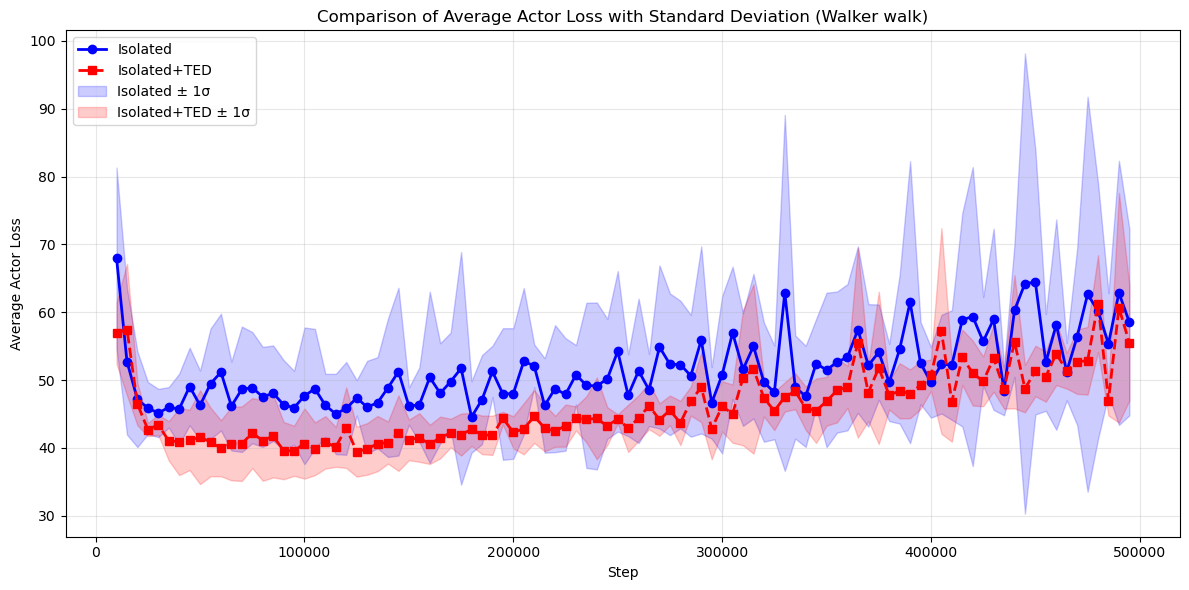

Isolated - Final avg return: 58.53 ± 13.74
Isolated+TED - Final avg return: 55.48 ± 8.48


In [16]:
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

import json
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

def compute_avg_returns_with_std(file_paths):
    step_to_returns = defaultdict(list)
    for path in file_paths:
        with open(path, 'r') as f:
            for line in f:
                try:
                    data = json.loads(line)
                    if 'model_grad_norm' in data:
                        step = data['step']
                        eval_return = data['model_grad_norm']
                        # Filter out inf and nan values
                        if np.isfinite(eval_return):
                            step_to_returns[step].append(eval_return)
                except json.JSONDecodeError:
                    continue
    
    steps = sorted(step_to_returns.keys())
    avg_returns = []
    std_returns = []
    
    for step in steps:
        returns = step_to_returns[step]
        if returns:  # Only compute if we have valid data
            avg_returns.append(np.mean(returns))
            std_returns.append(np.std(returns))
        else:
            # Skip this step entirely if no valid data
            continue
    
    return steps, avg_returns, std_returns

# Group 1: iso (baseline)
file_paths_1 = ['/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_1/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso/metrics.jsonl', 
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_2/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_3/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_5/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_6/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_7/metrics.jsonl'] 

# Group 2: iso+ted
file_paths_2 = ['/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_1/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted/metrics.jsonl', 
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_2/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_3/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_5/metrics.jsonl'] 

# Compute average returns and standard deviations for both groups
steps_1, avg_returns_1, std_returns_1 = compute_avg_returns_with_std(file_paths_1)
steps_2, avg_returns_2, std_returns_2 = compute_avg_returns_with_std(file_paths_2)

# Convert to numpy arrays for easier manipulation
steps_1, avg_returns_1, std_returns_1 = np.array(steps_1), np.array(avg_returns_1), np.array(std_returns_1)
steps_2, avg_returns_2, std_returns_2 = np.array(steps_2), np.array(avg_returns_2), np.array(std_returns_2)

# Plotting
plt.figure(figsize=(12, 6))

# Plot mean lines
plt.plot(steps_1, avg_returns_1, marker='o', linestyle='-', label='Isolated', color='blue', linewidth=2)
plt.plot(steps_2, avg_returns_2, marker='s', linestyle='--', label='Isolated+TED', color='red', linewidth=2)

# Add shaded regions for standard deviation
plt.fill_between(steps_1, avg_returns_1 - std_returns_1, avg_returns_1 + std_returns_1, 
                 alpha=0.2, color='blue', label='Isolated ± 1σ')
plt.fill_between(steps_2, avg_returns_2 - std_returns_2, avg_returns_2 + std_returns_2, 
                 alpha=0.2, color='red', label='Isolated+TED ± 1σ')

plt.xlabel('Step')
plt.ylabel('Average Actor Loss')
plt.title('Comparison of Average Actor Loss with Standard Deviation (Walker walk)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Optional: Print some statistics
print(f"Isolated - Final avg return: {avg_returns_1[-1]:.2f} ± {std_returns_1[-1]:.2f}")
print(f"Isolated+TED - Final avg return: {avg_returns_2[-1]:.2f} ± {std_returns_2[-1]:.2f}")

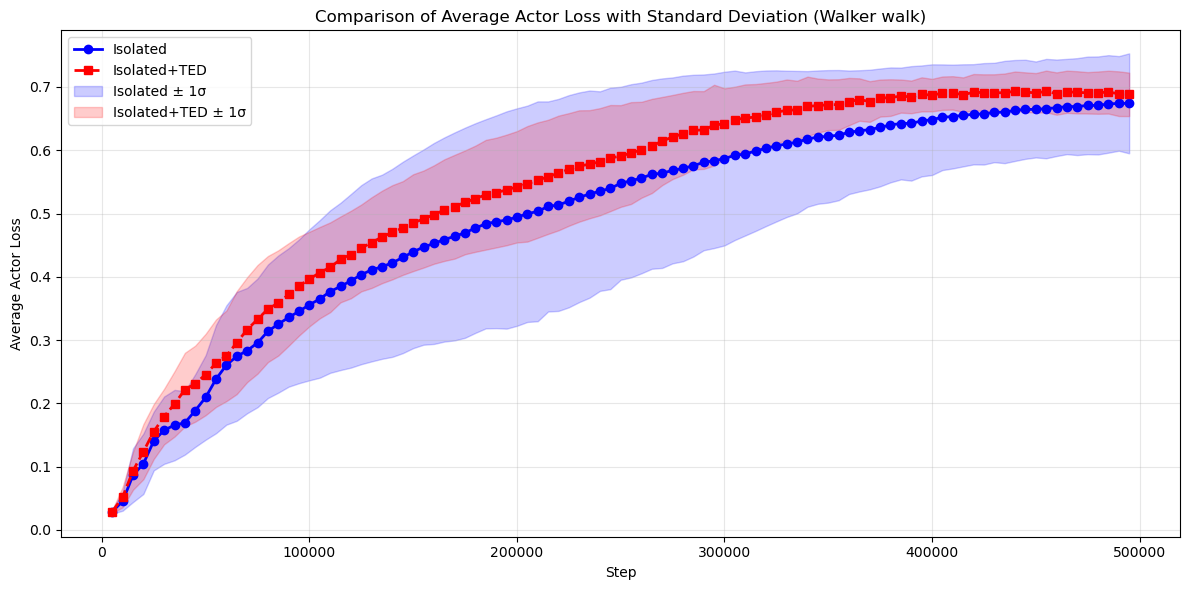

Isolated - Final avg return: 0.67 ± 0.08
Isolated+TED - Final avg return: 0.69 ± 0.03


In [18]:
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

import json
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

def compute_avg_returns_with_std(file_paths):
    step_to_returns = defaultdict(list)
    for path in file_paths:
        with open(path, 'r') as f:
            for line in f:
                try:
                    data = json.loads(line)
                    if 'reward_std' in data:
                        step = data['step']
                        eval_return = data['reward_std']
                        # Filter out inf and nan values
                        if np.isfinite(eval_return):
                            step_to_returns[step].append(eval_return)
                except json.JSONDecodeError:
                    continue
    
    steps = sorted(step_to_returns.keys())
    avg_returns = []
    std_returns = []
    
    for step in steps:
        returns = step_to_returns[step]
        if returns:  # Only compute if we have valid data
            avg_returns.append(np.mean(returns))
            std_returns.append(np.std(returns))
        else:
            # Skip this step entirely if no valid data
            continue
    
    return steps, avg_returns, std_returns

# Group 1: iso (baseline)
file_paths_1 = ['/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_1/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso/metrics.jsonl', 
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_2/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_3/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_5/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_6/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_7/metrics.jsonl'] 

# Group 2: iso+ted
file_paths_2 = ['/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_1/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted/metrics.jsonl', 
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_2/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_3/metrics.jsonl',
              '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_5/metrics.jsonl'] 

# Compute average returns and standard deviations for both groups
steps_1, avg_returns_1, std_returns_1 = compute_avg_returns_with_std(file_paths_1)
steps_2, avg_returns_2, std_returns_2 = compute_avg_returns_with_std(file_paths_2)

# Convert to numpy arrays for easier manipulation
steps_1, avg_returns_1, std_returns_1 = np.array(steps_1), np.array(avg_returns_1), np.array(std_returns_1)
steps_2, avg_returns_2, std_returns_2 = np.array(steps_2), np.array(avg_returns_2), np.array(std_returns_2)

# Plotting
plt.figure(figsize=(12, 6))

# Plot mean lines
plt.plot(steps_1, avg_returns_1, marker='o', linestyle='-', label='Isolated', color='blue', linewidth=2)
plt.plot(steps_2, avg_returns_2, marker='s', linestyle='--', label='Isolated+TED', color='red', linewidth=2)

# Add shaded regions for standard deviation
plt.fill_between(steps_1, avg_returns_1 - std_returns_1, avg_returns_1 + std_returns_1, 
                 alpha=0.2, color='blue', label='Isolated ± 1σ')
plt.fill_between(steps_2, avg_returns_2 - std_returns_2, avg_returns_2 + std_returns_2, 
                 alpha=0.2, color='red', label='Isolated+TED ± 1σ')

plt.xlabel('Step')
plt.ylabel('Average Actor Loss')
plt.title('Comparison of Average Actor Loss with Standard Deviation (Walker walk)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Optional: Print some statistics
print(f"Isolated - Final avg return: {avg_returns_1[-1]:.2f} ± {std_returns_1[-1]:.2f}")
print(f"Isolated+TED - Final avg return: {avg_returns_2[-1]:.2f} ± {std_returns_2[-1]:.2f}")

Found metrics: ['action_loss', 'actor_ent', 'actor_grad_norm', 'actor_loss', 'eval_episodes', 'eval_length', 'eval_return', 'fps', 'image_loss', 'kl', 'kl_balance', 'kl_free', 'kl_scale', 'max_action_loss', 'min_free_loss', 'model_grad_norm', 'model_loss', 'post_ent', 'post_ent_free', 'prior_ent', 'prior_ent_free', 'reward_loss', 'reward_mean', 'reward_std', 'ted_loss', 'train_episodes', 'train_length', 'train_return', 'value_grad_norm', 'value_loss']


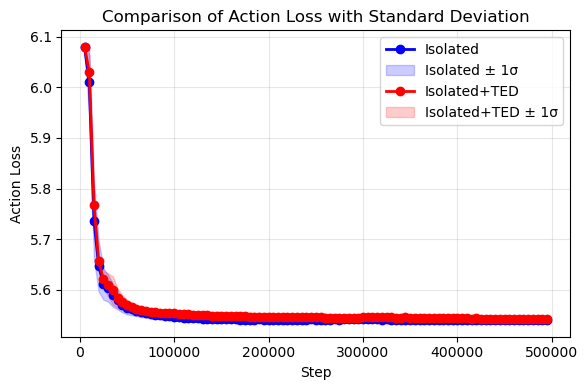


=== Action Loss Statistics ===
Isolated - Final value: 5.5399 ± 0.0045
Isolated+TED - Final value: 5.5416 ± 0.0034


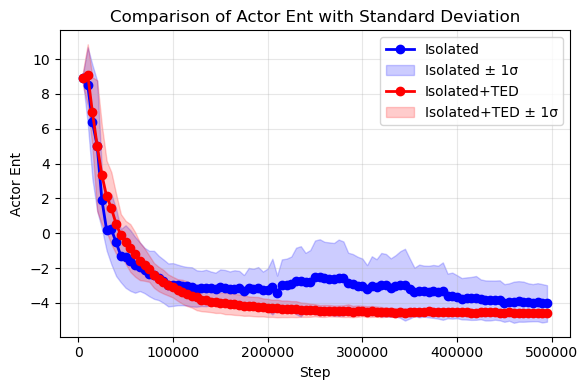


=== Actor Ent Statistics ===
Isolated - Final value: -4.0362 ± 1.0474
Isolated+TED - Final value: -4.5957 ± 0.2142


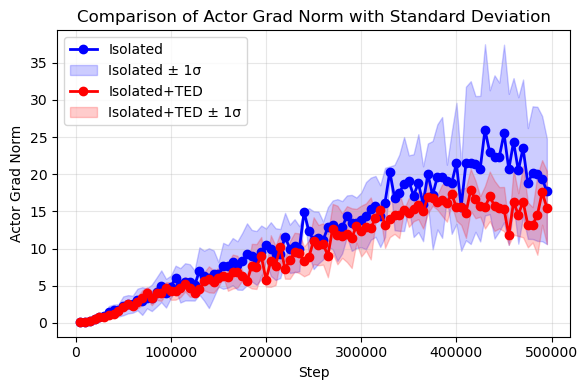


=== Actor Grad Norm Statistics ===
Isolated - Final value: 17.7037 ± 7.1012
Isolated+TED - Final value: 15.5201 ± 4.9262


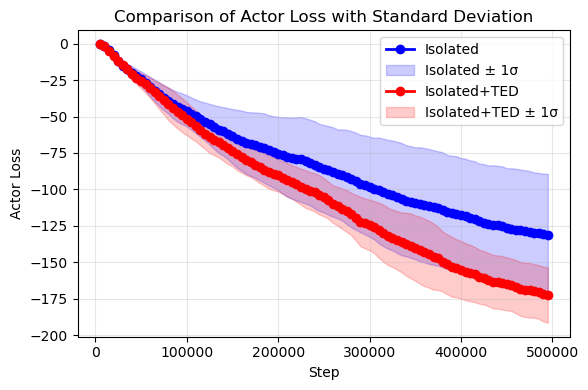


=== Actor Loss Statistics ===
Isolated - Final value: -131.0998 ± 41.7116
Isolated+TED - Final value: -172.5873 ± 19.0014


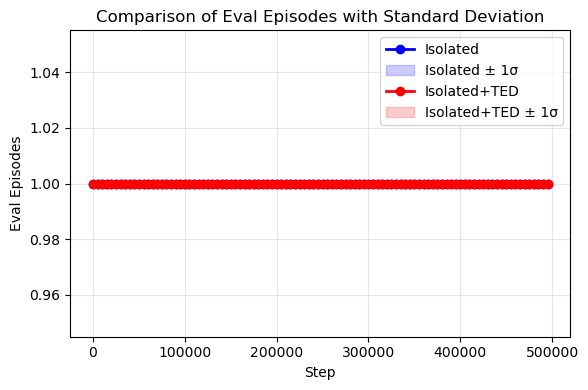


=== Eval Episodes Statistics ===
Isolated - Final value: 1.0000 ± 0.0000
Isolated+TED - Final value: 1.0000 ± 0.0000


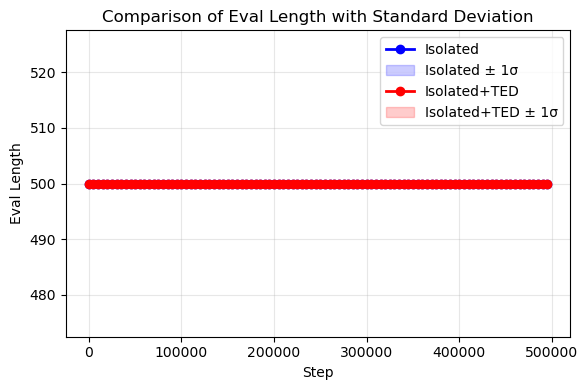


=== Eval Length Statistics ===
Isolated - Final value: 500.0000 ± 0.0000
Isolated+TED - Final value: 500.0000 ± 0.0000


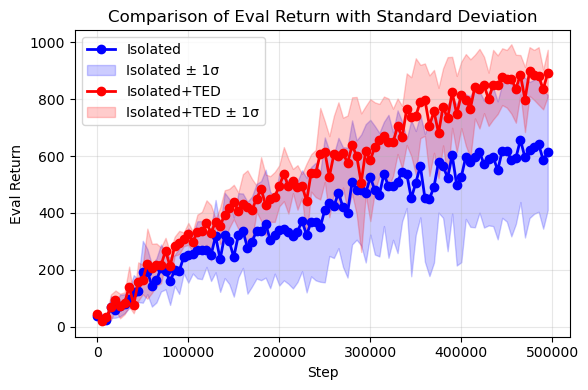


=== Eval Return Statistics ===
Isolated - Final value: 612.5944 ± 202.4873
Isolated+TED - Final value: 890.8404 ± 82.3869


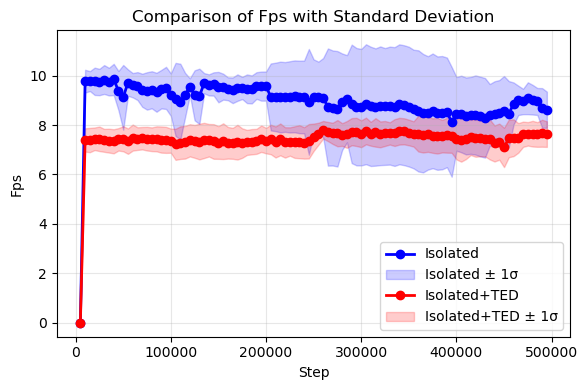


=== Fps Statistics ===
Isolated - Final value: 8.6190 ± 0.7302
Isolated+TED - Final value: 7.6307 ± 0.5170


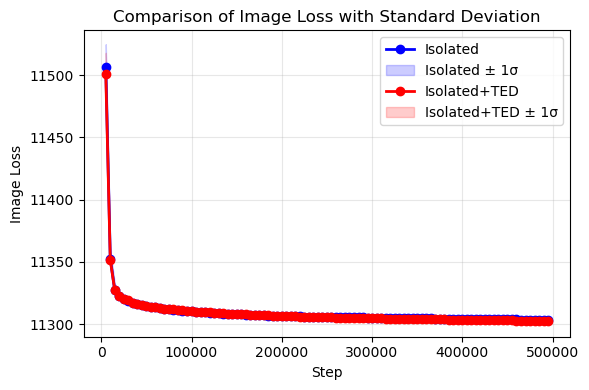


=== Image Loss Statistics ===
Isolated - Final value: 11303.4513 ± 2.4104
Isolated+TED - Final value: 11302.5678 ± 0.5087


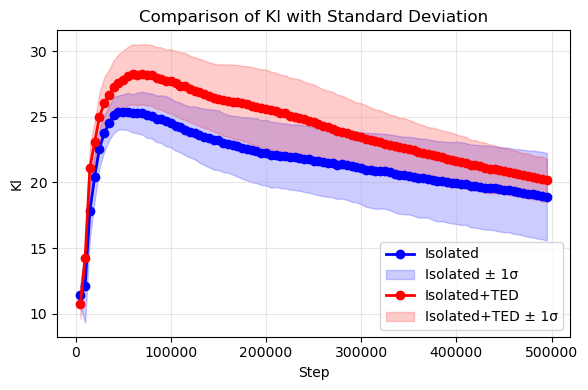


=== Kl Statistics ===
Isolated - Final value: 18.9134 ± 3.3277
Isolated+TED - Final value: 20.1708 ± 1.6423


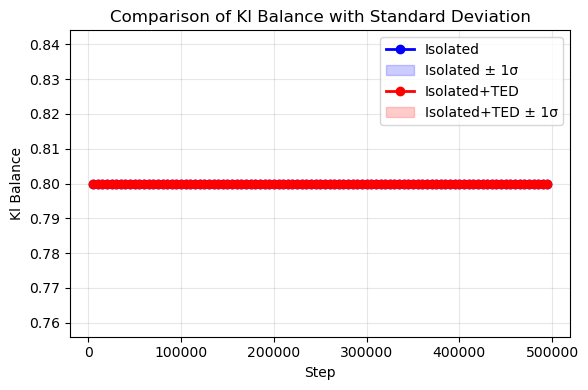


=== Kl Balance Statistics ===
Isolated - Final value: 0.8000 ± 0.0000
Isolated+TED - Final value: 0.8000 ± 0.0000


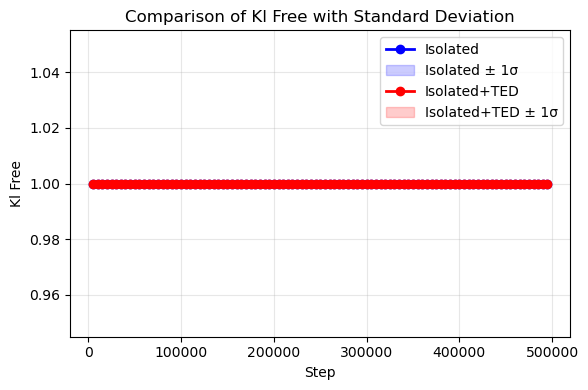


=== Kl Free Statistics ===
Isolated - Final value: 1.0000 ± 0.0000
Isolated+TED - Final value: 1.0000 ± 0.0000


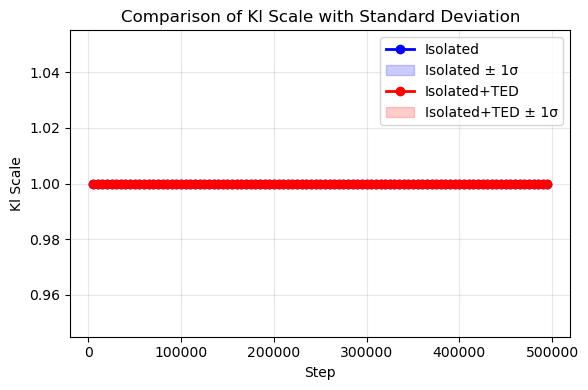


=== Kl Scale Statistics ===
Isolated - Final value: 1.0000 ± 0.0000
Isolated+TED - Final value: 1.0000 ± 0.0000


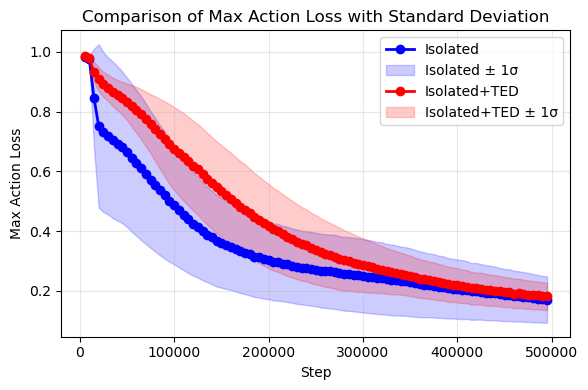


=== Max Action Loss Statistics ===
Isolated - Final value: 0.1711 ± 0.0776
Isolated+TED - Final value: 0.1817 ± 0.0457


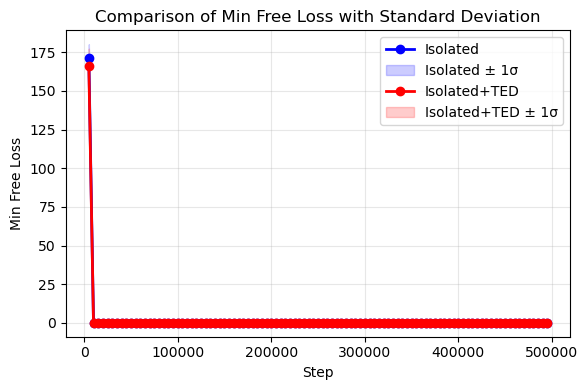


=== Min Free Loss Statistics ===
Isolated - Final value: 0.0010 ± 0.0017
Isolated+TED - Final value: 0.0003 ± 0.0001


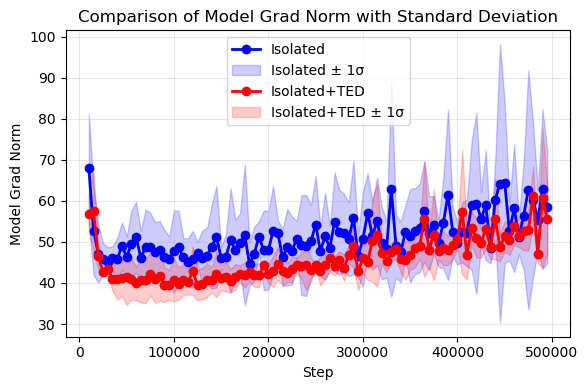


=== Model Grad Norm Statistics ===
Isolated - Final value: 58.5303 ± 13.7355
Isolated+TED - Final value: 55.4843 ± 8.4825


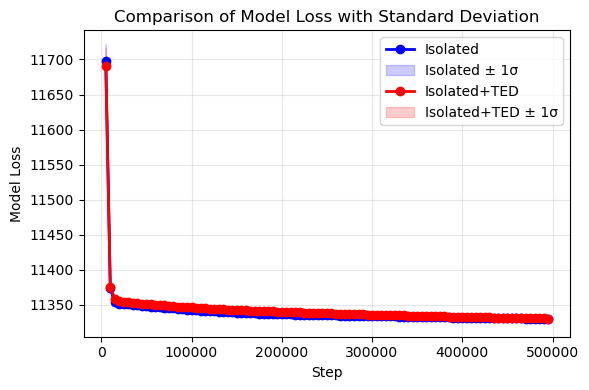


=== Model Loss Statistics ===
Isolated - Final value: 11329.9661 ± 5.5576
Isolated+TED - Final value: 11330.4857 ± 2.1185


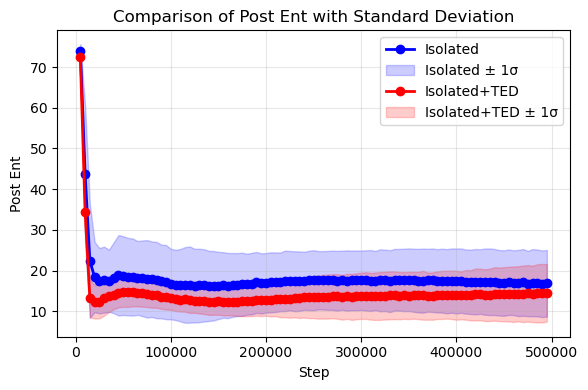


=== Post Ent Statistics ===
Isolated - Final value: 16.8778 ± 8.1791
Isolated+TED - Final value: 14.5199 ± 7.0578


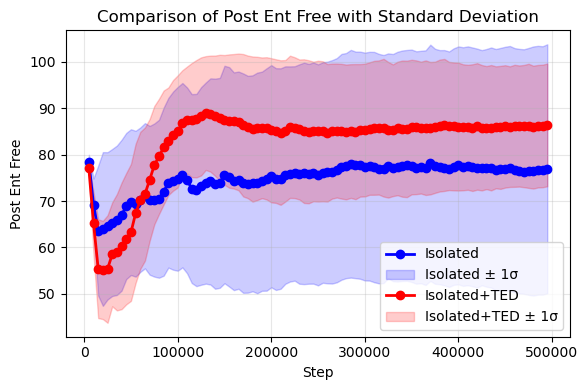


=== Post Ent Free Statistics ===
Isolated - Final value: 76.9550 ± 26.8514
Isolated+TED - Final value: 86.4219 ± 13.2331


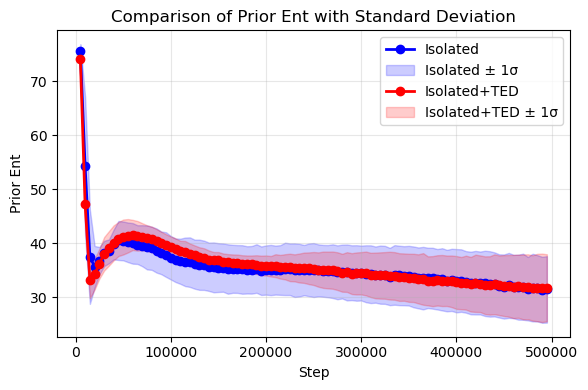


=== Prior Ent Statistics ===
Isolated - Final value: 31.4513 ± 6.1531
Isolated+TED - Final value: 31.7503 ± 6.2054


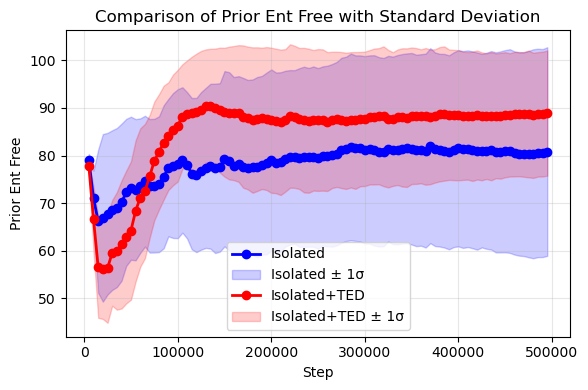


=== Prior Ent Free Statistics ===
Isolated - Final value: 80.8400 ± 21.9360
Isolated+TED - Final value: 88.9226 ± 13.1574


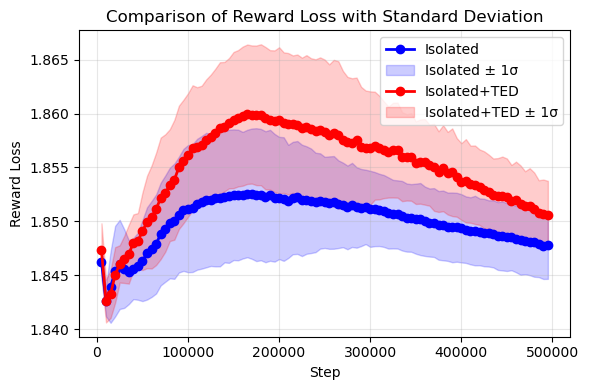


=== Reward Loss Statistics ===
Isolated - Final value: 1.8478 ± 0.0031
Isolated+TED - Final value: 1.8506 ± 0.0031


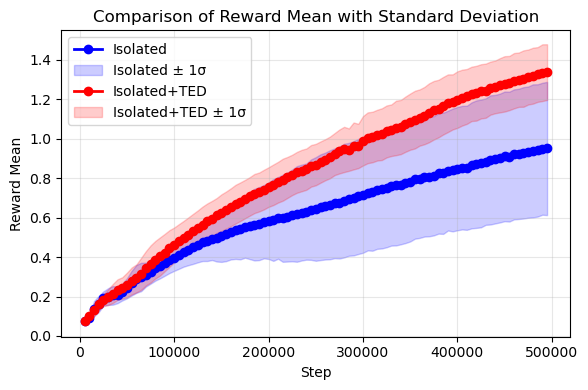


=== Reward Mean Statistics ===
Isolated - Final value: 0.9496 ± 0.3374
Isolated+TED - Final value: 1.3365 ± 0.1410


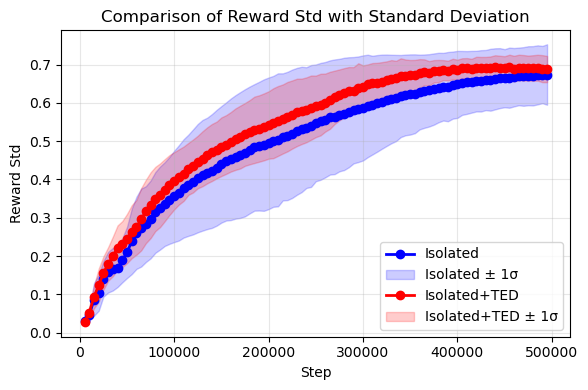


=== Reward Std Statistics ===
Isolated - Final value: 0.6741 ± 0.0790
Isolated+TED - Final value: 0.6883 ± 0.0343


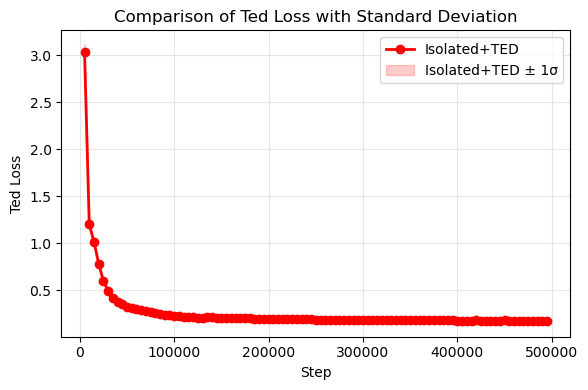


=== Ted Loss Statistics ===
Isolated+TED - Final value: 0.1731 ± 0.0189


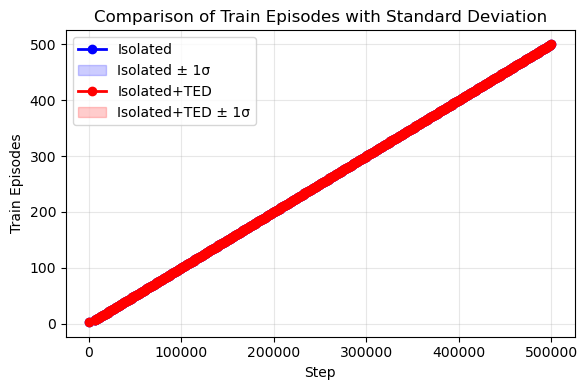


=== Train Episodes Statistics ===
Isolated - Final value: 500.0000 ± 0.0000
Isolated+TED - Final value: 500.0000 ± 0.0000


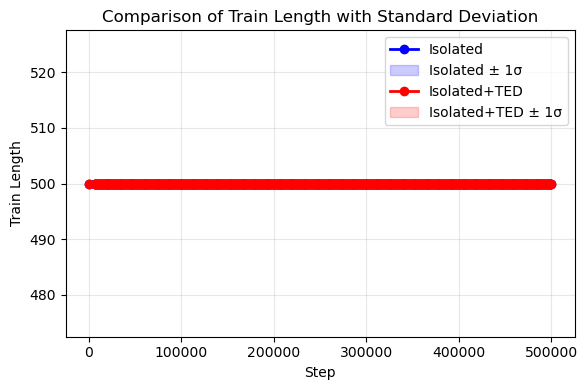


=== Train Length Statistics ===
Isolated - Final value: 500.0000 ± 0.0000
Isolated+TED - Final value: 500.0000 ± 0.0000


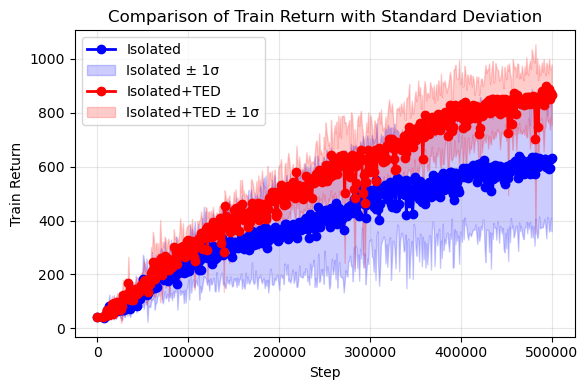


=== Train Return Statistics ===
Isolated - Final value: 631.2237 ± 271.5772
Isolated+TED - Final value: 866.0212 ± 112.2304


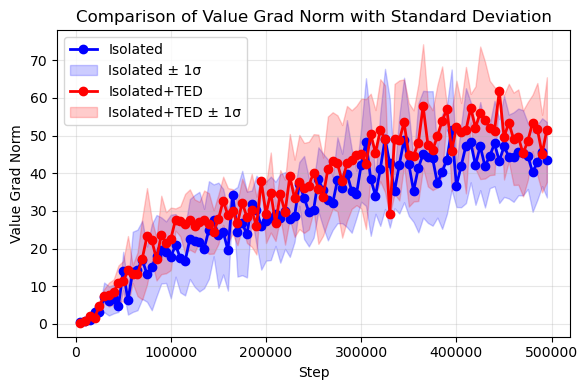


=== Value Grad Norm Statistics ===
Isolated - Final value: 43.5801 ± 10.0085
Isolated+TED - Final value: 51.5688 ± 13.8897


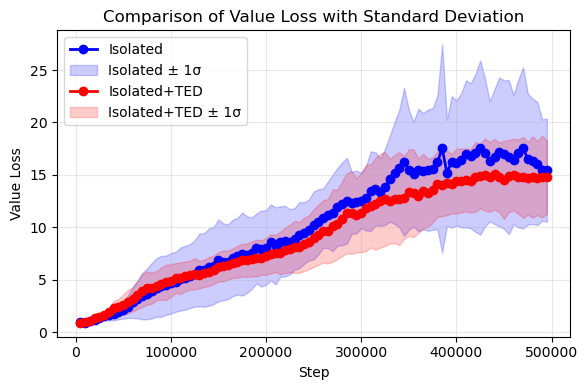


=== Value Loss Statistics ===
Isolated - Final value: 15.4545 ± 4.9205
Isolated+TED - Final value: 14.7713 ± 3.4709


In [28]:
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import os

def compute_avg_returns_with_std(file_paths, metric_key):
    """
    Compute average returns and standard deviation for a specific metric across multiple runs.
    
    Args:
        file_paths: List of paths to jsonl files
        metric_key: The key in the JSON data to extract (e.g., 'reward_std', 'actor_loss', etc.)
    
    Returns:
        steps, avg_values, std_values: Arrays of steps, average values, and standard deviations
    """
    step_to_values = defaultdict(list)
    
    for path in file_paths:
        if not os.path.exists(path):
            print(f"Warning: File {path} does not exist, skipping...")
            continue
            
        with open(path, 'r') as f:
            for line in f:
                try:
                    data = json.loads(line)
                    if metric_key in data:
                        step = data['step']
                        value = data[metric_key]
                        # Filter out inf and nan values
                        if np.isfinite(value):
                            step_to_values[step].append(value)
                except json.JSONDecodeError:
                    continue
    
    steps = sorted(step_to_values.keys())
    avg_values = []
    std_values = []
    
    for step in steps:
        values = step_to_values[step]
        if values:  # Only compute if we have valid data
            avg_values.append(np.mean(values))
            std_values.append(np.std(values))
    
    return np.array(steps), np.array(avg_values), np.array(std_values)

def get_all_metrics_from_files(file_paths):
    """
    Extract all available metric keys from the jsonl files.
    
    Args:
        file_paths: List of paths to jsonl files
    
    Returns:
        set: Set of all metric keys found in the files
    """
    all_metrics = set()
    
    for path in file_paths:
        if not os.path.exists(path):
            continue
            
        with open(path, 'r') as f:
            for line in f:
                try:
                    data = json.loads(line)
                    # Add all numeric keys (skip 'step' as it's the x-axis)
                    for key, value in data.items():
                        if key != 'step' and isinstance(value, (int, float)) and np.isfinite(value):
                            all_metrics.add(key)
                except json.JSONDecodeError:
                    continue
    
    return all_metrics

def plot_all_metrics(groups_dict, output_dir=None, figsize=(6, 4)):
    """
    Plot all available metrics for all groups.
    
    Args:
        groups_dict: Dictionary where keys are group names and values are lists of file paths
                    Example: {'Isolated': [path1, path2, ...], 'Isolated+TED': [path3, path4, ...]}
        output_dir: Directory to save plots (optional)
        figsize: Figure size tuple
    """
    # Get all unique metrics across all groups
    all_file_paths = []
    for paths in groups_dict.values():
        all_file_paths.extend(paths)
    
    all_metrics = get_all_metrics_from_files(all_file_paths)
    
    if not all_metrics:
        print("No metrics found in the files!")
        return
    
    print(f"Found metrics: {sorted(all_metrics)}")
    
    # Create output directory if specified
    if output_dir:
        os.makedirs(output_dir, exist_ok=True)
    
    # Define colors for different groups
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
    
    # Plot each metric
    for metric in sorted(all_metrics):
        plt.figure(figsize=figsize)
        
        group_data = {}
        
        # Compute data for each group
        for i, (group_name, file_paths) in enumerate(groups_dict.items()):
            steps, avg_values, std_values = compute_avg_returns_with_std(file_paths, metric)
            
            if len(steps) > 0:  # Only plot if we have data
                color = colors[i % len(colors)]
                
                # Plot mean line
                plt.plot(steps, avg_values, marker='o', linestyle='-', 
                        label=group_name, color=color, linewidth=2)
                
                # Add shaded region for standard deviation
                plt.fill_between(steps, avg_values - std_values, avg_values + std_values,
                               alpha=0.2, color=color, label=f'{group_name} ± 1σ')
                
                group_data[group_name] = (steps, avg_values, std_values)
        
        if group_data:  # Only create plot if we have data
            plt.xlabel('Step')
            plt.ylabel(metric.replace('_', ' ').title())
            plt.title(f'Comparison of {metric.replace("_", " ").title()} with Standard Deviation')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            
            # Save plot if output directory is specified
            if output_dir:
                plt.savefig(os.path.join(output_dir, f'{metric}_comparison.png'), dpi=300, bbox_inches='tight')
            
            plt.show()
            
            # Print final statistics
            print(f"\n=== {metric.replace('_', ' ').title()} Statistics ===")
            for group_name, (steps, avg_values, std_values) in group_data.items():
                if len(avg_values) > 0:
                    print(f"{group_name} - Final value: {avg_values[-1]:.4f} ± {std_values[-1]:.4f}")
        else:
            print(f"No data found for metric: {metric}")

def plot_specific_metrics(groups_dict, metrics_to_plot, output_dir=None, figsize=(12, 8)):
    """
    Plot specific metrics for all groups.
    
    Args:
        groups_dict: Dictionary where keys are group names and values are lists of file paths
        metrics_to_plot: List of specific metrics to plot
        output_dir: Directory to save plots (optional)
        figsize: Figure size tuple
    """
    # Create output directory if specified
    if output_dir:
        os.makedirs(output_dir, exist_ok=True)
    
    # Define colors for different groups
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
    
    # Plot each specified metric
    for metric in metrics_to_plot:
        plt.figure(figsize=figsize)
        
        group_data = {}
        
        # Compute data for each group
        for i, (group_name, file_paths) in enumerate(groups_dict.items()):
            steps, avg_values, std_values = compute_avg_returns_with_std(file_paths, metric)
            
            if len(steps) > 0:  # Only plot if we have data
                color = colors[i % len(colors)]
                
                # Plot mean line
                plt.plot(steps, avg_values, marker='o', linestyle='-', 
                        label=group_name, color=color, linewidth=2)
                
                # Add shaded region for standard deviation
                plt.fill_between(steps, avg_values - std_values, avg_values + std_values,
                               alpha=0.2, color=color, label=f'{group_name} ± 1σ')
                
                group_data[group_name] = (steps, avg_values, std_values)
        
        if group_data:  # Only create plot if we have data
            plt.xlabel('Step')
            plt.ylabel(metric.replace('_', ' ').title())
            plt.title(f'Comparison of {metric.replace("_", " ").title()} with Standard Deviation')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            
            # Save plot if output directory is specified
            if output_dir:
                plt.savefig(os.path.join(output_dir, f'{metric}_comparison.png'), dpi=300, bbox_inches='tight')
            
            plt.show()
            
            # Print final statistics
            print(f"\n=== {metric.replace('_', ' ').title()} Statistics ===")
            for group_name, (steps, avg_values, std_values) in group_data.items():
                if len(avg_values) > 0:
                    print(f"{group_name} - Final value: {avg_values[-1]:.4f} ± {std_values[-1]:.4f}")
        else:
            print(f"No data found for metric: {metric}")

# Example usage based on your original code:
if __name__ == "__main__":
    # Define your groups
    groups = {
        'Isolated': [
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_1/metrics.jsonl',
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso/metrics.jsonl', 
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_2/metrics.jsonl',
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_3/metrics.jsonl',
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_5/metrics.jsonl',
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_6/metrics.jsonl',
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_7/metrics.jsonl'
        ],
        'Isolated+TED': [
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_1/metrics.jsonl',
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted/metrics.jsonl', 
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_2/metrics.jsonl',
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_3/metrics.jsonl',
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_5/metrics.jsonl'
        ]
    }
    
    # Plot all available metrics
    plot_all_metrics(groups, output_dir='plots')
    
    # Or plot specific metrics only
    # plot_specific_metrics(groups, ['reward_std', 'actor_loss', 'critic_loss'], output_dir='plots')

In [4]:
import json
import numpy as np
from collections import defaultdict
import os

def compute_metric_data(file_paths, metric_key):
    """
    Extract metric data from jsonl files.
    
    Args:
        file_paths: List of paths to jsonl files
        metric_key: The key in the JSON data to extract
    
    Returns:
        steps, avg_values, std_values: Arrays of steps, average values, and standard deviations
    """
    step_to_values = defaultdict(list)
    
    for path in file_paths:
        if not os.path.exists(path):
            print(f"Warning: File {path} does not exist, skipping...")
            continue
            
        with open(path, 'r') as f:
            for line in f:
                try:
                    data = json.loads(line)
                    if metric_key in data:
                        step = data['step']
                        value = data[metric_key]
                        if np.isfinite(value):
                            step_to_values[step].append(value)
                except json.JSONDecodeError:
                    continue
    
    steps = sorted(step_to_values.keys())
    avg_values = []
    std_values = []
    
    for step in steps:
        values = step_to_values[step]
        if values:
            avg_values.append(np.mean(values))
            std_values.append(np.std(values))
    
    return np.array(steps), np.array(avg_values), np.array(std_values)

def get_all_metrics(file_paths):
    """
    Extract all available metric keys from jsonl files.
    """
    all_metrics = set()
    
    for path in file_paths:
        if not os.path.exists(path):
            continue
            
        with open(path, 'r') as f:
            for line in f:
                try:
                    data = json.loads(line)
                    for key, value in data.items():
                        if key != 'step' and isinstance(value, (int, float)) and np.isfinite(value):
                            all_metrics.add(key)
                except json.JSONDecodeError:
                    continue
    
    return all_metrics

def analyze_fluctuation_degree(groups_dict, output_file=None):
    """
    Analyze fluctuation degree and calculate means for each trend across groups.
    
    Args:
        groups_dict: Dictionary where keys are group names and values are lists of file paths
        output_file: Optional file path to save detailed analysis
    
    Returns:
        dict: Complete analysis results
    """
    # Get all available metrics
    all_file_paths = []
    for paths in groups_dict.values():
        all_file_paths.extend(paths)
    
    all_metrics = get_all_metrics(all_file_paths)
    
    if not all_metrics:
        print("❌ No metrics found in the files!")
        return {}
    
    print(f"📊 Found {len(all_metrics)} metrics: {sorted(all_metrics)}")
    
    # Store all analysis results
    analysis_results = {}
    
    print("\n" + "="*120)
    print("🔍 DETAILED FLUCTUATION ANALYSIS")
    print("="*120)
    print(f"{'Metric':<20} {'Group':<15} {'Mean':<12} {'Std Dev':<12} {'CV(%)':<8} {'Range':<12} {'Fluct.Score':<12} {'Trend':<10} {'Stability':<10}")
    print("-" * 120)
    
    for metric in sorted(all_metrics):
        analysis_results[metric] = {}
        
        for group_name, file_paths in groups_dict.items():
            steps, avg_values, std_values = compute_metric_data(file_paths, metric)
            
            if len(avg_values) > 0:
                # Basic statistics
                mean_val = np.mean(avg_values)
                std_val = np.std(avg_values)
                cv = (std_val / abs(mean_val)) * 100 if mean_val != 0 else 0
                range_val = np.max(avg_values) - np.min(avg_values)
                
                # Fluctuation score: deviation from linear trend
                if len(avg_values) > 1:
                    trend_line = np.linspace(avg_values[0], avg_values[-1], len(avg_values))
                    fluctuation_score = np.mean(np.abs(avg_values - trend_line))
                else:
                    fluctuation_score = 0
                
                # Trend analysis
                trend_direction = "📈 Up" if len(avg_values) > 1 and avg_values[-1] > avg_values[0] else "📉 Down"
                if len(avg_values) > 1:
                    trend_strength = abs(avg_values[-1] - avg_values[0]) / abs(avg_values[0]) if avg_values[0] != 0 else 0
                else:
                    trend_strength = 0
                
                # Stability classification
                if cv < 5:
                    stability = "🟢 Stable"
                elif cv < 15:
                    stability = "🟡 Medium"
                elif cv < 30:
                    stability = "🟠 Volatile"
                else:
                    stability = "🔴 Chaotic"
                
                # Store comprehensive results
                analysis_results[metric][group_name] = {
                    'mean': mean_val,
                    'std': std_val,
                    'cv': cv,
                    'range': range_val,
                    'fluctuation_score': fluctuation_score,
                    'trend_direction': trend_direction,
                    'trend_strength': trend_strength,
                    'stability': stability,
                    'initial_value': avg_values[0] if len(avg_values) > 0 else 0,
                    'final_value': avg_values[-1] if len(avg_values) > 0 else 0,
                    'min_value': np.min(avg_values),
                    'max_value': np.max(avg_values),
                    'data_points': len(avg_values)
                }
                
                # Print formatted results
                print(f"{metric:<20} {group_name:<15} {mean_val:<12.4f} {std_val:<12.4f} {cv:<8.2f} {range_val:<12.4f} {fluctuation_score:<12.4f} {trend_direction:<10} {stability:<10}")
    
    print("="*120)
    
    # Generate summary insights
    print("\n🎯 KEY INSIGHTS SUMMARY:")
    print("="*80)
    
    for metric in sorted(all_metrics):
        if metric in analysis_results and len(analysis_results[metric]) >= 2:
            print(f"\n📈 {metric.replace('_', ' ').title()}:")
            
            # Compare groups
            group_data = analysis_results[metric]
            
            # Find most stable group
            most_stable = min(group_data.items(), key=lambda x: x[1]['cv'])
            most_volatile = max(group_data.items(), key=lambda x: x[1]['cv'])
            
            print(f"   🏆 Most Stable: {most_stable[0]} (CV: {most_stable[1]['cv']:.2f}%)")
            print(f"   ⚠️  Most Volatile: {most_volatile[0]} (CV: {most_volatile[1]['cv']:.2f}%)")
            
            # Compare means
            print(f"   📊 Mean Comparison:")
            for group_name, data in group_data.items():
                change = ((data['final_value'] - data['initial_value']) / abs(data['initial_value']) * 100) if data['initial_value'] != 0 else 0
                print(f"      {group_name}: {data['mean']:.4f} (Change: {change:+.1f}%) {data['stability']}")
    
    # Overall group comparison
    print(f"\n🏁 OVERALL GROUP PERFORMANCE:")
    print("-" * 50)
    
    group_stability_scores = {}
    group_means = {}
    
    for group_name in groups_dict.keys():
        total_cv = 0
        total_metrics = 0
        group_means[group_name] = {}
        
        for metric, group_data in analysis_results.items():
            if group_name in group_data:
                total_cv += group_data[group_name]['cv']
                total_metrics += 1
                group_means[group_name][metric] = group_data[group_name]['mean']
        
        avg_cv = total_cv / total_metrics if total_metrics > 0 else 0
        group_stability_scores[group_name] = avg_cv
        
        stability_rating = "🟢 Excellent" if avg_cv < 10 else "🟡 Good" if avg_cv < 20 else "🟠 Fair" if avg_cv < 30 else "🔴 Poor"
        print(f"{group_name:<15}: Average CV = {avg_cv:.2f}% {stability_rating}")
    
    # Save detailed results to file
    if output_file:
        with open(output_file, 'w') as f:
            f.write("COMPREHENSIVE TREND FLUCTUATION ANALYSIS\n")
            f.write("="*60 + "\n\n")
            
            f.write("DETAILED METRICS ANALYSIS:\n")
            f.write("-" * 40 + "\n")
            
            for metric, groups in analysis_results.items():
                f.write(f"\nMetric: {metric}\n")
                f.write("." * 30 + "\n")
                
                for group_name, data in groups.items():
                    f.write(f"  {group_name}:\n")
                    f.write(f"    Mean: {data['mean']:.6f}\n")
                    f.write(f"    Standard Deviation: {data['std']:.6f}\n")
                    f.write(f"    Coefficient of Variation: {data['cv']:.2f}%\n")
                    f.write(f"    Range: {data['range']:.6f}\n")
                    f.write(f"    Fluctuation Score: {data['fluctuation_score']:.6f}\n")
                    f.write(f"    Trend: {data['trend_direction']}\n")
                    f.write(f"    Stability: {data['stability']}\n")
                    f.write(f"    Values: {data['initial_value']:.4f} → {data['final_value']:.4f}\n")
                    f.write(f"    Min/Max: {data['min_value']:.4f} / {data['max_value']:.4f}\n")
                    f.write(f"    Data Points: {data['data_points']}\n\n")
            
            f.write("\nGROUP STABILITY RANKING:\n")
            f.write("-" * 30 + "\n")
            for group, score in sorted(group_stability_scores.items(), key=lambda x: x[1]):
                f.write(f"{group}: {score:.2f}% average CV\n")
        
        print(f"\n💾 Detailed analysis saved to: {output_file}")
    
    return analysis_results

# Example usage
if __name__ == "__main__":
    # Define your experimental groups
    groups = {
        'Isolated': [
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_1/metrics.jsonl',
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso/metrics.jsonl', 
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_2/metrics.jsonl',
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_3/metrics.jsonl',
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_5/metrics.jsonl',
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_6/metrics.jsonl',
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_7/metrics.jsonl'
        ],
        'Isolated+TED': [
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_1/metrics.jsonl',
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted/metrics.jsonl', 
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_2/metrics.jsonl',
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_3/metrics.jsonl',
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_5/metrics.jsonl'
        ]
    }
    
    # Run comprehensive fluctuation analysis
    results = analyze_fluctuation_degree(groups, output_file='fluctuation_analysis.txt')
    
    # You can also access specific results programmatically
    # Example: Get mean values for reward_std
    if 'reward_std' in results:
        print(f"\n🎯 Reward Std Analysis:")
        for group, data in results['reward_std'].items():
            print(f"   {group}: Mean = {data['mean']:.4f}, CV = {data['cv']:.2f}%")

📊 Found 30 metrics: ['action_loss', 'actor_ent', 'actor_grad_norm', 'actor_loss', 'eval_episodes', 'eval_length', 'eval_return', 'fps', 'image_loss', 'kl', 'kl_balance', 'kl_free', 'kl_scale', 'max_action_loss', 'min_free_loss', 'model_grad_norm', 'model_loss', 'post_ent', 'post_ent_free', 'prior_ent', 'prior_ent_free', 'reward_loss', 'reward_mean', 'reward_std', 'ted_loss', 'train_episodes', 'train_length', 'train_return', 'value_grad_norm', 'value_loss']

🔍 DETAILED FLUCTUATION ANALYSIS
Metric               Group           Mean         Std Dev      CV(%)    Range        Fluct.Score  Trend      Stability 
------------------------------------------------------------------------------------------------------------------------
action_loss          Isolated        5.5586       0.0741       1.33     0.5389       0.2508       📉 Down     🟢 Stable  
action_loss          Isolated+TED    5.5635       0.0758       1.36     0.5385       0.2474       📉 Down     🟢 Stable  
actor_ent            Isol

In [1]:
import json
import numpy as np
from collections import defaultdict
import os

def extract_individual_trend_data(file_path, metric_key):
    """
    Extract complete trend data from a single file.
    
    Args:
        file_path: Path to single jsonl file
        metric_key: The metric to extract
    
    Returns:
        steps, values: Arrays of steps and corresponding values for this single run
    """
    step_to_value = {}
    
    if not os.path.exists(file_path):
        return np.array([]), np.array([])
    
    with open(file_path, 'r') as f:
        for line in f:
            try:
                data = json.loads(line)
                if metric_key in data:
                    step = data['step']
                    value = data[metric_key]
                    if np.isfinite(value):
                        step_to_value[step] = value
            except json.JSONDecodeError:
                continue
    
    if not step_to_value:
        return np.array([]), np.array([])
    
    steps = sorted(step_to_value.keys())
    values = [step_to_value[step] for step in steps]
    
    return np.array(steps), np.array(values)

def calculate_individual_metrics(values):
    """
    Calculate all fluctuation metrics for a single trend.
    
    Args:
        values: Array of values from a single trend
    
    Returns:
        dict: Dictionary containing all calculated metrics
    """
    if len(values) == 0:
        return None
    
    # Basic statistics
    mean_val = np.mean(values)
    std_val = np.std(values)
    cv = (std_val / abs(mean_val)) * 100 if mean_val != 0 else 0
    range_val = np.max(values) - np.min(values)
    
    # Fluctuation metrics
    if len(values) > 1:
        # Deviation from linear trend
        trend_line = np.linspace(values[0], values[-1], len(values))
        fluctuation_score = np.mean(np.abs(values - trend_line))
        
        # Trend strength
        trend_strength = abs(values[-1] - values[0]) / abs(values[0]) if values[0] != 0 else 0
        trend_direction = "increasing" if values[-1] > values[0] else "decreasing"
        
        # Volatility (consecutive differences)
        consecutive_diffs = np.abs(np.diff(values))
        volatility = np.mean(consecutive_diffs)
        
        # Monotonicity (how consistent the trend direction is)
        diffs = np.diff(values)
        if len(diffs) > 0:
            monotonicity = np.sum(np.sign(diffs[0]) == np.sign(diffs)) / len(diffs)
        else:
            monotonicity = 1.0
    else:
        fluctuation_score = 0
        trend_strength = 0
        trend_direction = "constant"
        volatility = 0
        monotonicity = 1.0
    
    # Stability classification
    if cv < 5:
        stability = "stable"
    elif cv < 15:
        stability = "moderate"
    elif cv < 30:
        stability = "volatile"
    else:
        stability = "chaotic"
    
    return {
        'mean': mean_val,
        'std': std_val,
        'cv': cv,
        'range': range_val,
        'fluctuation_score': fluctuation_score,
        'trend_direction': trend_direction,
        'trend_strength': trend_strength,
        'volatility': volatility,
        'monotonicity': monotonicity,
        'stability': stability,
        'initial_value': values[0],
        'final_value': values[-1],
        'min_value': np.min(values),
        'max_value': np.max(values),
        'data_points': len(values)
    }

def get_all_metrics_from_files(file_paths):
    """Extract all available metric keys from jsonl files."""
    all_metrics = set()
    
    for path in file_paths:
        if not os.path.exists(path):
            continue
            
        with open(path, 'r') as f:
            for line in f:
                try:
                    data = json.loads(line)
                    for key, value in data.items():
                        if key != 'step' and isinstance(value, (int, float)) and np.isfinite(value):
                            all_metrics.add(key)
                except json.JSONDecodeError:
                    continue
    
    return all_metrics

def analyze_individual_trends_then_average(groups_dict, output_file=None):
    """
    Calculate metrics for each individual trend first, then average those metrics.
    
    Args:
        groups_dict: Dictionary where keys are group names and values are lists of file paths
        output_file: Optional file path to save detailed analysis
    
    Returns:
        dict: Complete analysis results
    """
    # Get all available metrics
    all_file_paths = []
    for paths in groups_dict.values():
        all_file_paths.extend(paths)
    
    all_metrics = get_all_metrics_from_files(all_file_paths)
    
    if not all_metrics:
        print("❌ No metrics found in the files!")
        return {}
    
    print(f"📊 Found {len(all_metrics)} metrics: {sorted(all_metrics)}")
    print(f"📁 Analyzing {len(all_file_paths)} total files across {len(groups_dict)} groups")
    
    # Store results
    analysis_results = {}
    individual_results = {}  # Store individual run results
    
    print("\n" + "="*140)
    print("🔍 INDIVIDUAL TREND ANALYSIS (Calculate metrics per trend, then average)")
    print("="*140)
    print(f"{'Metric':<18} {'Group':<15} {'Runs':<5} {'Mean±SD':<15} {'CV±SD':<12} {'Range±SD':<15} {'Fluct±SD':<12} {'Volat±SD':<12} {'Stab':<8}")
    print("-" * 140)
    
    for metric in sorted(all_metrics):
        analysis_results[metric] = {}
        individual_results[metric] = {}
        
        for group_name, file_paths in groups_dict.items():
            individual_metrics = []
            individual_results[metric][group_name] = []
            
            print(f"\n  📂 Processing {group_name} - {metric}:")
            
            # Calculate metrics for each individual file/trend
            for i, file_path in enumerate(file_paths):
                steps, values = extract_individual_trend_data(file_path, metric)
                
                if len(values) > 0:
                    individual_metric = calculate_individual_metrics(values)
                    if individual_metric:
                        individual_metrics.append(individual_metric)
                        individual_results[metric][group_name].append(individual_metric)
                        print(f"     Run {i+1}: Mean={individual_metric['mean']:.4f}, CV={individual_metric['cv']:.2f}%, Stability={individual_metric['stability']}")
                else:
                    print(f"     Run {i+1}: No data found")
            
            if individual_metrics:
                # Now average all the individual metrics
                n_runs = len(individual_metrics)
                
                # Calculate averages and standard deviations of metrics
                avg_metrics = {}
                std_metrics = {}
                
                metric_keys = ['mean', 'std', 'cv', 'range', 'fluctuation_score', 'trend_strength', 
                              'volatility', 'monotonicity', 'initial_value', 'final_value', 
                              'min_value', 'max_value']
                
                for key in metric_keys:
                    values = [m[key] for m in individual_metrics]
                    avg_metrics[key] = np.mean(values)
                    std_metrics[key] = np.std(values)
                
                # Count stability categories
                stability_counts = {}
                trend_direction_counts = {}
                
                for m in individual_metrics:
                    stab = m['stability']
                    trend = m['trend_direction']
                    stability_counts[stab] = stability_counts.get(stab, 0) + 1
                    trend_direction_counts[trend] = trend_direction_counts.get(trend, 0) + 1
                
                # Most common categories
                most_common_stability = max(stability_counts.items(), key=lambda x: x[1])[0]
                most_common_trend = max(trend_direction_counts.items(), key=lambda x: x[1])[0]
                
                # Store averaged results
                analysis_results[metric][group_name] = {
                    'n_runs': n_runs,
                    'avg_mean': avg_metrics['mean'],
                    'std_mean': std_metrics['mean'],
                    'avg_cv': avg_metrics['cv'],
                    'std_cv': std_metrics['cv'],
                    'avg_range': avg_metrics['range'],
                    'std_range': std_metrics['range'],
                    'avg_fluctuation': avg_metrics['fluctuation_score'],
                    'std_fluctuation': std_metrics['fluctuation_score'],
                    'avg_volatility': avg_metrics['volatility'],
                    'std_volatility': std_metrics['volatility'],
                    'avg_monotonicity': avg_metrics['monotonicity'],
                    'std_monotonicity': std_metrics['monotonicity'],
                    'most_common_stability': most_common_stability,
                    'most_common_trend': most_common_trend,
                    'stability_distribution': stability_counts,
                    'trend_distribution': trend_direction_counts,
                    'avg_initial': avg_metrics['initial_value'],
                    'avg_final': avg_metrics['final_value'],
                    'individual_metrics': individual_metrics
                }
                
                # Print summary row
                stability_icon = {"stable": "🟢", "moderate": "🟡", "volatile": "🟠", "chaotic": "🔴"}.get(most_common_stability, "❓")
                print(f"{metric:<18} {group_name:<15} {n_runs:<5} {avg_metrics['mean']:.3f}±{std_metrics['mean']:.3f} {avg_metrics['cv']:.1f}±{std_metrics['cv']:.1f} {avg_metrics['range']:.3f}±{std_metrics['range']:.3f} {avg_metrics['fluctuation_score']:.3f}±{std_metrics['fluctuation_score']:.3f} {avg_metrics['volatility']:.3f}±{std_metrics['volatility']:.3f} {stability_icon}{most_common_stability[:4]}")
    
    print("="*140)
    
    # Generate detailed comparison
    print(f"\n🎯 DETAILED GROUP COMPARISON:")
    print("="*80)
    
    for metric in sorted(all_metrics):
        if metric in analysis_results and len(analysis_results[metric]) >= 2:
            print(f"\n📈 {metric.replace('_', ' ').title()}:")
            
            # Compare groups
            group_data = analysis_results[metric]
            
            print(f"   📊 Mean Values (Individual→Averaged):")
            for group_name, data in group_data.items():
                print(f"      {group_name}: {data['avg_mean']:.4f} ± {data['std_mean']:.4f} (from {data['n_runs']} runs)")
            
            print(f"   📏 Coefficient of Variation:")
            for group_name, data in group_data.items():
                print(f"      {group_name}: {data['avg_cv']:.2f}% ± {data['std_cv']:.2f}% ({data['most_common_stability']})")
            
            print(f"   🌊 Fluctuation Score:")
            for group_name, data in group_data.items():
                print(f"      {group_name}: {data['avg_fluctuation']:.4f} ± {data['std_fluctuation']:.4f}")
    
    # Overall comparison
    print(f"\n🏆 OVERALL GROUP PERFORMANCE SUMMARY:")
    print("-" * 60)
    
    overall_stability = {}
    overall_consistency = {}
    
    for group_name in groups_dict.keys():
        total_cv = 0
        total_consistency = 0
        total_metrics = 0
        
        for metric, group_data in analysis_results.items():
            if group_name in group_data:
                total_cv += group_data[group_name]['avg_cv']
                total_consistency += (1 - group_data[group_name]['std_cv'] / 100)  # Lower std_cv = more consistent
                total_metrics += 1
        
        if total_metrics > 0:
            avg_cv = total_cv / total_metrics
            avg_consistency = total_consistency / total_metrics
            overall_stability[group_name] = avg_cv
            overall_consistency[group_name] = avg_consistency
            
            stability_rating = "🟢 Excellent" if avg_cv < 10 else "🟡 Good" if avg_cv < 20 else "🟠 Fair" if avg_cv < 30 else "🔴 Poor"
            consistency_rating = "🎯 High" if avg_consistency > 0.8 else "📊 Medium" if avg_consistency > 0.6 else "📈 Low"
            
            print(f"{group_name}:")
            print(f"  Average CV across metrics: {avg_cv:.2f}% {stability_rating}")
            print(f"  Cross-run consistency: {avg_consistency:.3f} {consistency_rating}")
    
    # Save results
    if output_file:
        with open(output_file, 'w') as f:
            f.write("INDIVIDUAL TREND ANALYSIS RESULTS\n")
            f.write("(Metrics calculated per trend, then averaged)\n")
            f.write("="*60 + "\n\n")
            
            for metric, groups in analysis_results.items():
                f.write(f"Metric: {metric}\n")
                f.write("-" * 40 + "\n")
                
                for group_name, data in groups.items():
                    f.write(f"\n{group_name} ({data['n_runs']} runs):\n")
                    f.write(f"  Average Mean: {data['avg_mean']:.6f} ± {data['std_mean']:.6f}\n")
                    f.write(f"  Average CV: {data['avg_cv']:.2f}% ± {data['std_cv']:.2f}%\n")
                    f.write(f"  Average Range: {data['avg_range']:.6f} ± {data['std_range']:.6f}\n")
                    f.write(f"  Average Fluctuation: {data['avg_fluctuation']:.6f} ± {data['std_fluctuation']:.6f}\n")
                    f.write(f"  Average Volatility: {data['avg_volatility']:.6f} ± {data['std_volatility']:.6f}\n")
                    f.write(f"  Most Common Stability: {data['most_common_stability']}\n")
                    f.write(f"  Most Common Trend: {data['most_common_trend']}\n")
                    f.write(f"  Stability Distribution: {data['stability_distribution']}\n")
                    f.write(f"  Individual Run Details:\n")
                    
                    for i, ind_metric in enumerate(data['individual_metrics']):
                        f.write(f"    Run {i+1}: Mean={ind_metric['mean']:.4f}, CV={ind_metric['cv']:.2f}%, Stability={ind_metric['stability']}\n")
                
                f.write("\n" + "="*50 + "\n")
        
        print(f"\n💾 Detailed analysis saved to: {output_file}")
    
    return analysis_results, individual_results

# Example usage
if __name__ == "__main__":
    # Define your experimental groups
    groups = {
        'Isolated': [
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_1/metrics.jsonl',
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso/metrics.jsonl', 
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_2/metrics.jsonl',
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_3/metrics.jsonl',
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_6/metrics.jsonl',
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_7/metrics.jsonl',
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_8/metrics.jsonl',
        ],
        'Isolated+TED': [
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_1/metrics.jsonl',
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted/metrics.jsonl', 
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_2/metrics.jsonl',
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_3/metrics.jsonl',
            '/storage/ssd1/richtsai1103/iso_ted/log/dmcbg_walker_walk/iso_ted_5/metrics.jsonl'
        ]
    }
    
    # Run the correct analysis: calculate metrics per individual trend, then average
    results, individual_data = analyze_individual_trends_then_average(groups, output_file='individual_trend_analysis.txt')
    
    # Example: Access specific results
    if 'reward_std' in results:
        print(f"\n🎯 Example - Reward Std Analysis:")
        for group, data in results['reward_std'].items():
            print(f"   {group}: Average Mean = {data['avg_mean']:.4f} ± {data['std_mean']:.4f}")
            print(f"   {group}: Average CV = {data['avg_cv']:.2f}% ± {data['std_cv']:.2f}%")

📊 Found 30 metrics: ['action_loss', 'actor_ent', 'actor_grad_norm', 'actor_loss', 'eval_episodes', 'eval_length', 'eval_return', 'fps', 'image_loss', 'kl', 'kl_balance', 'kl_free', 'kl_scale', 'max_action_loss', 'min_free_loss', 'model_grad_norm', 'model_loss', 'post_ent', 'post_ent_free', 'prior_ent', 'prior_ent_free', 'reward_loss', 'reward_mean', 'reward_std', 'ted_loss', 'train_episodes', 'train_length', 'train_return', 'value_grad_norm', 'value_loss']
📁 Analyzing 12 total files across 2 groups

🔍 INDIVIDUAL TREND ANALYSIS (Calculate metrics per trend, then average)
Metric             Group           Runs  Mean±SD         CV±SD        Range±SD        Fluct±SD     Volat±SD     Stab    
--------------------------------------------------------------------------------------------------------------------------------------------

  📂 Processing Isolated - action_loss:
     Run 1: Mean=5.5592, CV=1.45%, Stability=stable
     Run 2: Mean=5.5630, CV=1.41%, Stability=stable
     Run 3: Mean=

Keys in the file: ['image', 'is_terminal', 'is_first', 'reward', 'discount', 'action', 'logprob']
image: shape=(2505, 64, 64, 3), dtype=uint8
is_terminal: shape=(2505,), dtype=bool
is_first: shape=(2505,), dtype=bool
reward: shape=(2505,), dtype=float32
discount: shape=(2505,), dtype=float32
action: shape=(2501, 6), dtype=float32
logprob: shape=(2501,), dtype=float32

First few rewards: [0.         0.33231154 0.33330756 0.3326488  0.33140382 0.5829691
 0.680345   0.4170928  0.29684523 0.17662811]
Episode length: 2504
Total return: 213.8157
First few actions: [[-0.          0.         -0.         -0.         -0.          0.        ]
 [-0.00748682  0.5364436  -0.82304513 -0.735939   -0.38515437  0.26815736]
 [-0.01981318  0.7928895  -0.08874404  0.26461256 -0.30221307 -0.19656539]
 [-0.9553485  -0.6622821  -0.4122231   0.03704357  0.3953352   0.6000228 ]
 [-0.6779411  -0.43546283  0.36321712  0.83038795 -0.20580018  0.74831176]]
Image shape: (2505, 64, 64, 3)


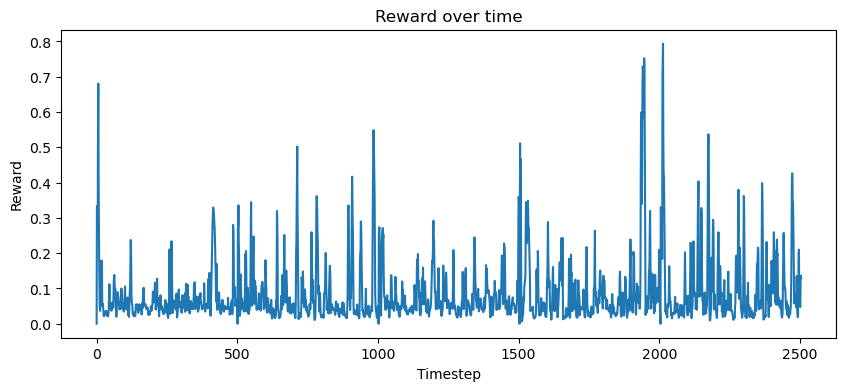

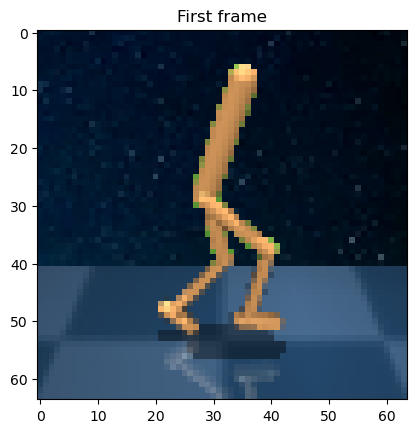

In [6]:
import numpy as np

# Load the file
data = np.load('/home/richtsai1103/CRL/dreamerv3-torch/logdir/dmc_walker_walk/train_eps/env_139448282059664-2505.npz')

# See what keys are available
print("Keys in the file:", list(data.keys()))

# Access individual arrays
for key in data.keys():
    print(f"{key}: shape={data[key].shape}, dtype={data[key].dtype}")

# Example: Look at specific data
print("\nFirst few rewards:", data['reward'][:10])
print("Episode length:", len(data['reward']) - 1)  # -1 because first step has reward=0
print("Total return:", data['reward'].sum())

# Look at first few actions
if 'action' in data:
    print("First few actions:", data['action'][:5])

# Look at image shape if available
if 'image' in data:
    print("Image shape:", data['image'].shape)
    
import matplotlib.pyplot as plt

# Plot rewards over time
plt.figure(figsize=(10, 4))
plt.plot(data['reward'])
plt.title('Reward over time')
plt.xlabel('Timestep')
plt.ylabel('Reward')
plt.show()

# Show first frame if images exist
if 'image' in data:
    plt.figure()
    plt.imshow(data['image'][0])
    plt.title('First frame')
    plt.show()

Keys in the file: ['image', 'is_terminal', 'is_first', 'reward', 'discount', 'action', 'logprob']
image: shape=(501, 64, 64, 3), dtype=uint8
is_terminal: shape=(501,), dtype=bool
is_first: shape=(501,), dtype=bool
reward: shape=(501,), dtype=float32
discount: shape=(501,), dtype=float32
action: shape=(501, 6), dtype=float32
logprob: shape=(501,), dtype=float32

First few rewards: [0.         0.33231154 0.33330756 0.3326488  0.33140382 0.5829691
 0.680345   0.4170928  0.29684523 0.17662811]
Episode length: 500
Total return: 36.06904
First few actions: [[-0.          0.         -0.         -0.         -0.          0.        ]
 [-0.00748682  0.5364436  -0.82304513 -0.735939   -0.38515437  0.26815736]
 [-0.01981318  0.7928895  -0.08874404  0.26461256 -0.30221307 -0.19656539]
 [-0.9553485  -0.6622821  -0.4122231   0.03704357  0.3953352   0.6000228 ]
 [-0.6779411  -0.43546283  0.36321712  0.83038795 -0.20580018  0.74831176]]
Image shape: (501, 64, 64, 3)


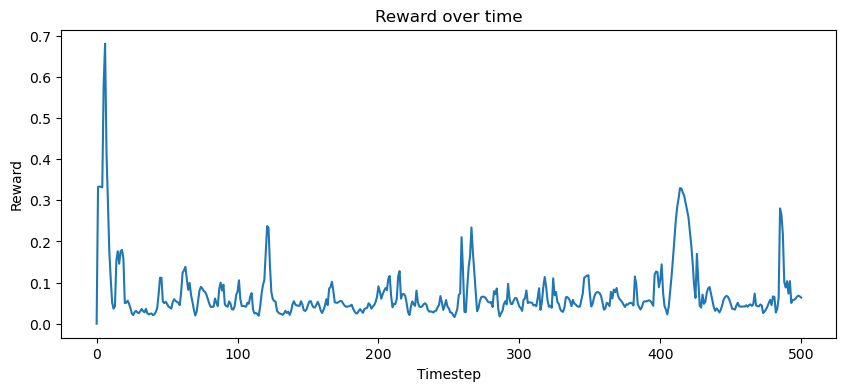

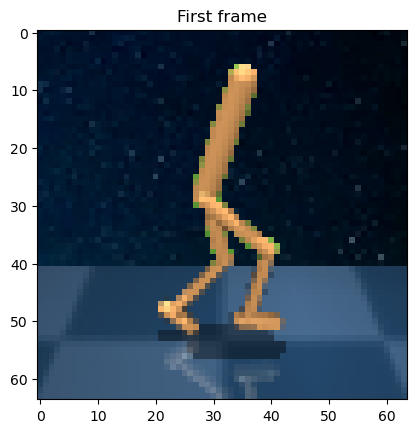

In [7]:
import numpy as np

# Load the file
data = np.load('/home/richtsai1103/CRL/dreamerv3-torch/logdir/dmc_walker_walk/train_eps/env_139448282059664-501.npz')

# See what keys are available
print("Keys in the file:", list(data.keys()))

# Access individual arrays
for key in data.keys():
    print(f"{key}: shape={data[key].shape}, dtype={data[key].dtype}")

# Example: Look at specific data
print("\nFirst few rewards:", data['reward'][:10])
print("Episode length:", len(data['reward']) - 1)  # -1 because first step has reward=0
print("Total return:", data['reward'].sum())

# Look at first few actions
if 'action' in data:
    print("First few actions:", data['action'][:5])

# Look at image shape if available
if 'image' in data:
    print("Image shape:", data['image'].shape)
    
import matplotlib.pyplot as plt

# Plot rewards over time
plt.figure(figsize=(10, 4))
plt.plot(data['reward'])
plt.title('Reward over time')
plt.xlabel('Timestep')
plt.ylabel('Reward')
plt.show()

# Show first frame if images exist
if 'image' in data:
    plt.figure()
    plt.imshow(data['image'][0])
    plt.title('First frame')
    plt.show()

In [4]:
import numpy as np
import cv2

# Load the data
data = np.load('/home/richtsai1103/CRL/dreamerv3-torch/logdir/dmc_walker_walk/train_eps/env_139448282059664-2505.npz')
images = data['image']

# Convert to uint8 if needed
if images.dtype != np.uint8:
    if images.max() <= 1.0:
        images = (images * 255).astype(np.uint8)
    else:
        images = images.astype(np.uint8)

# Convert RGB to BGR for OpenCV
images_bgr = images[..., ::-1]

# Create video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('walker_episode.mp4', fourcc, 20.0, (64, 64))

# Write frames
for frame in images_bgr:
    out.write(frame)

out.release()
print("Video saved as walker_episode.mp4")

Video saved as walker_episode.mp4


In [1]:
import json
import numpy as np

# Read the JSON log file
def parse_eval_returns(file_path):
    """
    Parse eval_return values from a JSON log file.
    
    Args:
        file_path (str): Path to the JSON log file
    
    Returns:
        list: List of eval_return values
    """
    eval_returns = []
    
    with open(file_path, 'r') as f:
        for line in f:
            try:
                # Parse each line as JSON
                data = json.loads(line.strip())
                
                # Check if this line contains eval_return
                if 'eval_return' in data:
                    eval_returns.append(data['eval_return'])
                    
            except json.JSONDecodeError:
                # Skip lines that aren't valid JSON
                continue
    
    return eval_returns
    

def calculate_stats(eval_returns):
    """
    Calculate mean, variance, and standard deviation of eval returns.
    
    Args:
        eval_returns (list): List of eval_return values
    
    Returns:
        dict: Dictionary containing statistical measures
    """
    if not eval_returns:
        return {"error": "No eval_return values found"}
    
    eval_returns = np.array(eval_returns)
    
    stats = {
        "count": len(eval_returns),
        "mean": float(np.mean(eval_returns)),
        "variance": float(np.var(eval_returns, ddof=1)),  # Sample variance
        "std_dev": float(np.std(eval_returns, ddof=1)),   # Sample standard deviation
        "min": float(np.min(eval_returns)),
        "max": float(np.max(eval_returns)),
        "median": float(np.median(eval_returns))
    }
    
    return stats

eval_returns = parse_eval_returns('/home/richtsai1103/CRL/MBRL_with_Isolated_Imaginations/iso_rl/test/walker_walk/metrics.jsonl')
stats = calculate_stats(eval_returns)
# Print results
print("Evaluation Return Statistics:")
print("=" * 40)
print(f"Count: {stats['count']}")
print(f"Mean: {stats['mean']:.2f}")
print(f"Variance: {stats['variance']:.2f}")
print(f"Standard Deviation: {stats['std_dev']:.2f}")
print(f"Minimum: {stats['min']:.2f}")
print(f"Maximum: {stats['max']:.2f}")
print(f"Median: {stats['median']:.2f}")

# Additional useful statistics
print("\nAdditional Info:")
print(f"Range: {stats['max'] - stats['min']:.2f}")
print(f"Coefficient of Variation: {(stats['std_dev'] / stats['mean']) * 100:.2f}%")

Evaluation Return Statistics:
Count: 101
Mean: 165.13
Variance: 11617.96
Standard Deviation: 107.79
Minimum: 20.09
Maximum: 433.58
Median: 145.46

Additional Info:
Range: 413.49
Coefficient of Variation: 65.27%


In [2]:
eval_returns = parse_eval_returns('/home/richtsai1103/CRL/MBRL_with_Isolated_Imaginations/iso_rl/test/walker_walk_isoted/metrics.jsonl')
stats = calculate_stats(eval_returns)
# Print results
print("Evaluation Return Statistics:")
print("=" * 40)
print(f"Count: {stats['count']}")
print(f"Mean: {stats['mean']:.2f}")
print(f"Variance: {stats['variance']:.2f}")
print(f"Standard Deviation: {stats['std_dev']:.2f}")
print(f"Minimum: {stats['min']:.2f}")
print(f"Maximum: {stats['max']:.2f}")
print(f"Median: {stats['median']:.2f}")

# Additional useful statistics
print("\nAdditional Info:")
print(f"Range: {stats['max'] - stats['min']:.2f}")
print(f"Coefficient of Variation: {(stats['std_dev'] / stats['mean']) * 100:.2f}%")

Evaluation Return Statistics:
Count: 101
Mean: 96.01
Variance: 5069.68
Standard Deviation: 71.20
Minimum: 19.68
Maximum: 435.79
Median: 74.96

Additional Info:
Range: 416.11
Coefficient of Variation: 74.16%
